Regarding the dataset
*  **RowNumber**—corresponds to the record (row) number and has no effect on the output.
*   **CustomerId**—contains random values and has no effect on customer leaving the bank.
*   **Surname**—the surname of a customer has no impact on their decision to leave the bank.
*   **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
*   **Geography**—a customer’s location can affect their decision to leave the bank.
*  **Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
*   **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
*   **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

*   **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
*   **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
*   **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
*   **IsActiveMember**—active customers are less likely to leave the bank.
EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
*   **Exited**—whether or not the customer left the bank. 0 - NO, 1 - YES
*   **Complain**—customer has complaint or not.
*   **Satisfaction Score**—Score provided by the customer for their complaint resolution.
*   **Card Type**—type of card hold by the customer.
*   **Points Earned**—the points earned by the customer for using credit card.
Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.












In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Data Exploration

In [ ]:
data = pd.read_csv('/content/updated_bank_churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
data.shape

(30000, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           30000 non-null  int64  
 1   CustomerId          30000 non-null  int64  
 2   Surname             30000 non-null  object 
 3   CreditScore         30000 non-null  int64  
 4   Geography           30000 non-null  object 
 5   Gender              30000 non-null  object 
 6   Age                 30000 non-null  int64  
 7   Tenure              30000 non-null  int64  
 8   Balance             30000 non-null  float64
 9   NumOfProducts       30000 non-null  int64  
 10  HasCrCard           30000 non-null  int64  
 11  IsActiveMember      30000 non-null  int64  
 12  EstimatedSalary     30000 non-null  float64
 13  Exited              30000 non-null  int64  
 14  Complain            30000 non-null  int64  
 15  Satisfaction Score  30000 non-null  int64  
 16  Card

In [ ]:
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [ ]:
data.shape

(30000, 15)

In [ ]:
data.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         30000 non-null  int64  
 1   Geography           30000 non-null  object 
 2   Gender              30000 non-null  object 
 3   Age                 30000 non-null  int64  
 4   Tenure              30000 non-null  int64  
 5   Balance             30000 non-null  float64
 6   NumOfProducts       30000 non-null  int64  
 7   HasCrCard           30000 non-null  int64  
 8   IsActiveMember      30000 non-null  int64  
 9   EstimatedSalary     30000 non-null  float64
 10  Exited              30000 non-null  int64  
 11  Complain            30000 non-null  int64  
 12  Satisfaction Score  30000 non-null  int64  
 13  Card Type           30000 non-null  object 
 14  Point Earned        30000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 3.4

In [ ]:
for i in data.select_dtypes(include=['object']).columns:
    print(f"Value counts for {i}:")
    print(data[i].value_counts())
    print("\n")

Value counts for Geography:
Geography
France     15177
Germany     7451
Spain       7372
Name: count, dtype: int64


Value counts for Gender:
Gender
Male      16379
Female    13621
Name: count, dtype: int64


Value counts for Card Type:
Card Type
DIAMOND     7594
SILVER      7564
GOLD        7478
PLATINUM    7364
Name: count, dtype: int64




In [ ]:
for i in data.select_dtypes(include=['number']).columns:
    print(f"Value counts for {i}:")
    print(data[i].value_counts())
    print("\n")

Value counts for CreditScore:
CreditScore
850    706
678    191
705    176
655    160
714    159
      ... 
440      2
373      2
386      2
407      1
382      1
Name: count, Length: 460, dtype: int64


Value counts for Age:
Age
38    1451
35    1445
37    1394
40    1346
34    1346
      ... 
84       5
92       5
83       4
88       3
85       1
Name: count, Length: 70, dtype: int64


Value counts for Tenure:
Tenure
2     3132
8     3129
1     3111
4     3059
5     3023
7     2992
9     2988
3     2987
6     2894
10    1461
0     1224
Name: count, dtype: int64


Value counts for Balance:
Balance
0.00         10940
150578.00       11
190305.78       10
164757.56       10
168883.08       10
             ...  
98495.72         1
103391.38        1
112045.67        1
145359.99        1
113680.54        1
Name: count, Length: 6382, dtype: int64


Value counts for NumOfProducts:
NumOfProducts
1    15293
2    13767
3      751
4      189
Name: count, dtype: int64


Value counts for HasCrCar

# Exploratory Data Analysis

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,30000.0,650.405467,96.891554,350.00,583.0,652.00,718.00,850.00
Age,30000.0,38.905200,10.469495,18.00,32.0,37.00,44.00,92.00
Tenure,30000.0,5.017633,2.892093,0.00,3.0,5.00,8.00,10.00
Balance,30000.0,76171.463212,62497.169547,0.00,0.0,96877.21,127758.09,250898.09
NumOfProducts,30000.0,1.527867,0.580604,1.00,1.0,1.00,2.00,4.00
HasCrCard,30000.0,0.703933,0.456528,0.00,0.0,1.00,1.00,1.00
IsActiveMember,30000.0,0.521533,0.499544,0.00,0.0,1.00,1.00,1.00
EstimatedSalary,30000.0,100136.550556,57439.481675,11.58,51219.8,100350.53,149340.61,199992.48
Exited,30000.0,0.205500,0.404073,0.00,0.0,0.00,0.00,1.00
Complain,30000.0,0.203500,0.402608,0.00,0.0,0.00,0.00,1.00


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Geography,30000,3,France,15177
Gender,30000,2,Male,16379
Card Type,30000,4,DIAMOND,7594


Value counts for Geography:
Geography
France     15177
Germany     7451
Spain       7372
Name: count, dtype: int64




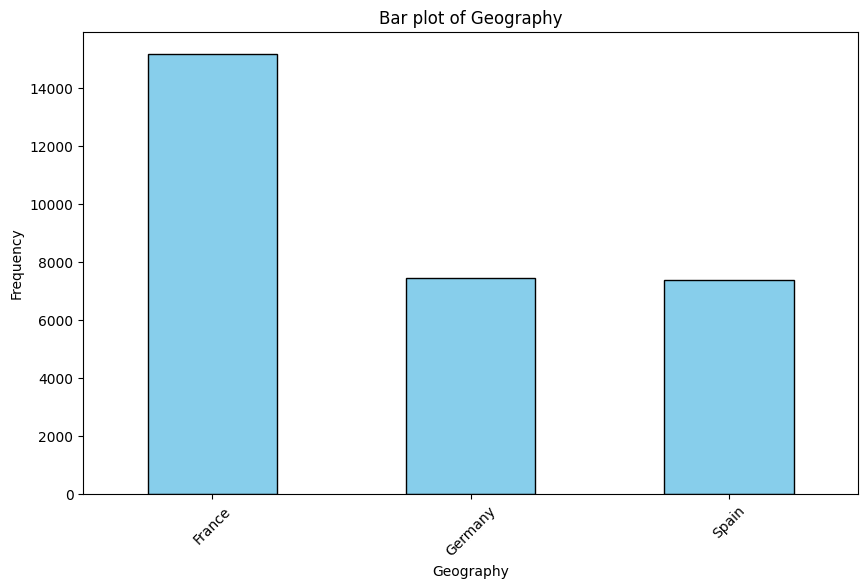

Value counts for Gender:
Gender
Male      16379
Female    13621
Name: count, dtype: int64




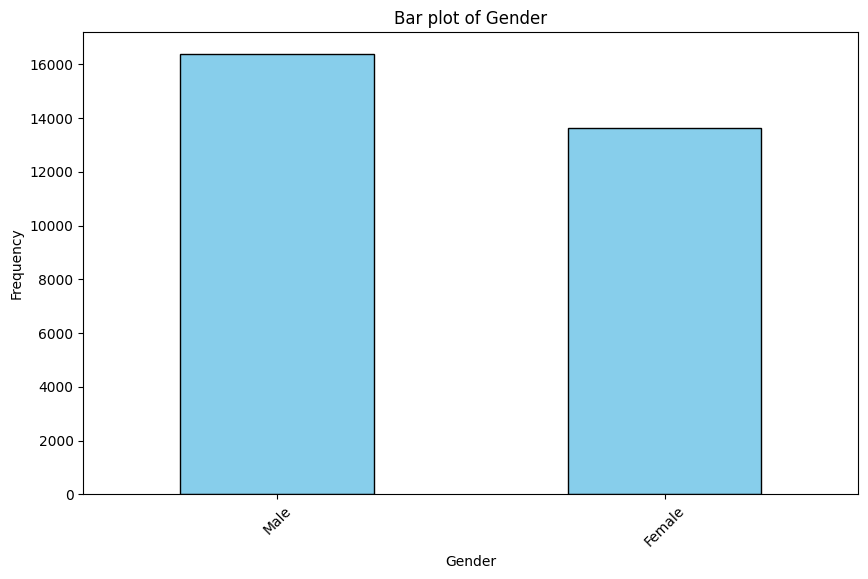

Value counts for Card Type:
Card Type
DIAMOND     7594
SILVER      7564
GOLD        7478
PLATINUM    7364
Name: count, dtype: int64




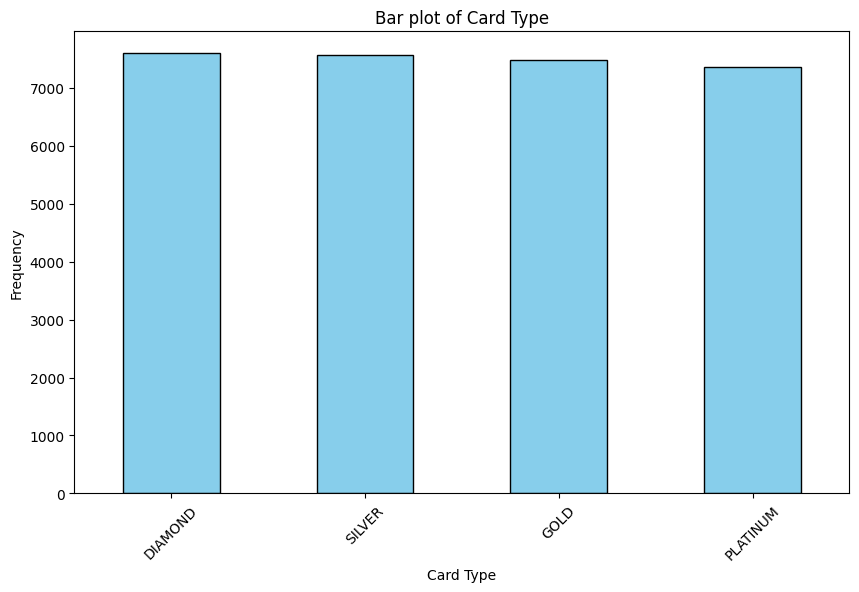

In [ ]:
obj_columns = data.select_dtypes(include=['object']).columns
for column in obj_columns:
    if column in data.columns:
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")

        plt.figure(figsize=(10, 6))
        data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Bar plot of {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column {column} does not exist in the DataFrame.")

<Axes: xlabel='Tenure', ylabel='count'>

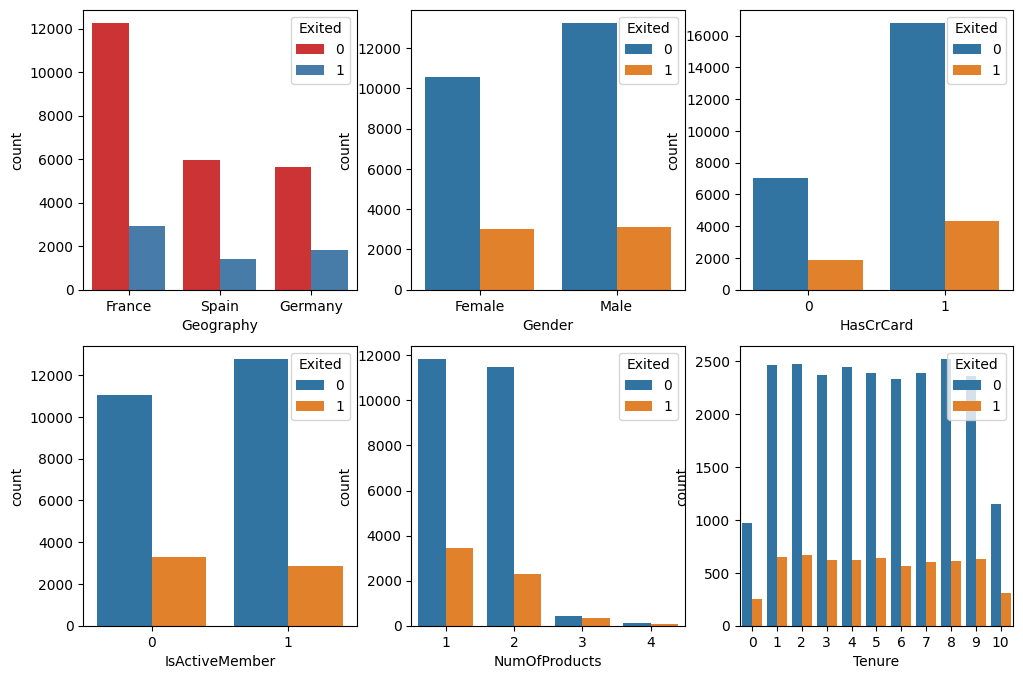

In [ ]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0],palette='Set1')
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[0][2])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='NumOfProducts', hue = 'Exited',data = data, ax=axarr[1][1])
sns.countplot(x='Tenure', hue = 'Exited',data = data, ax=axarr[1][2])



*  France has more number of exits.
*  Customers who have credit card have more exits in comparison to no card.
*   Active members are less likely to exit.
*   Customers with lesser no of products have more exits.





In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,23835
1,6165


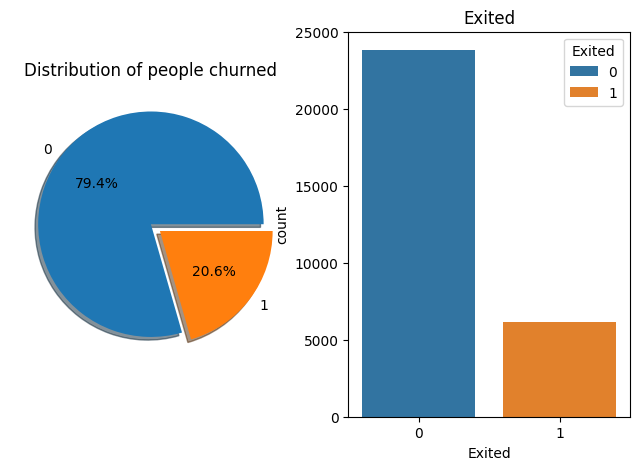

In [ ]:
f,ax=plt.subplots(1,2,figsize=(8,5))
data['Exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of people churned')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=data,ax=ax[1],hue='Exited')
ax[1].set_title('Exited')
plt.show()

The pie chart representing the distribution of customers who have exited and those who haven't shows a clear distinction. Approximately 21% of customers have churned (Exited), while the remaining 79% have chosen to continue their relationship with the bank. This disparity indicates an imbalance in the churn behavior within the dataset.

<Axes: >

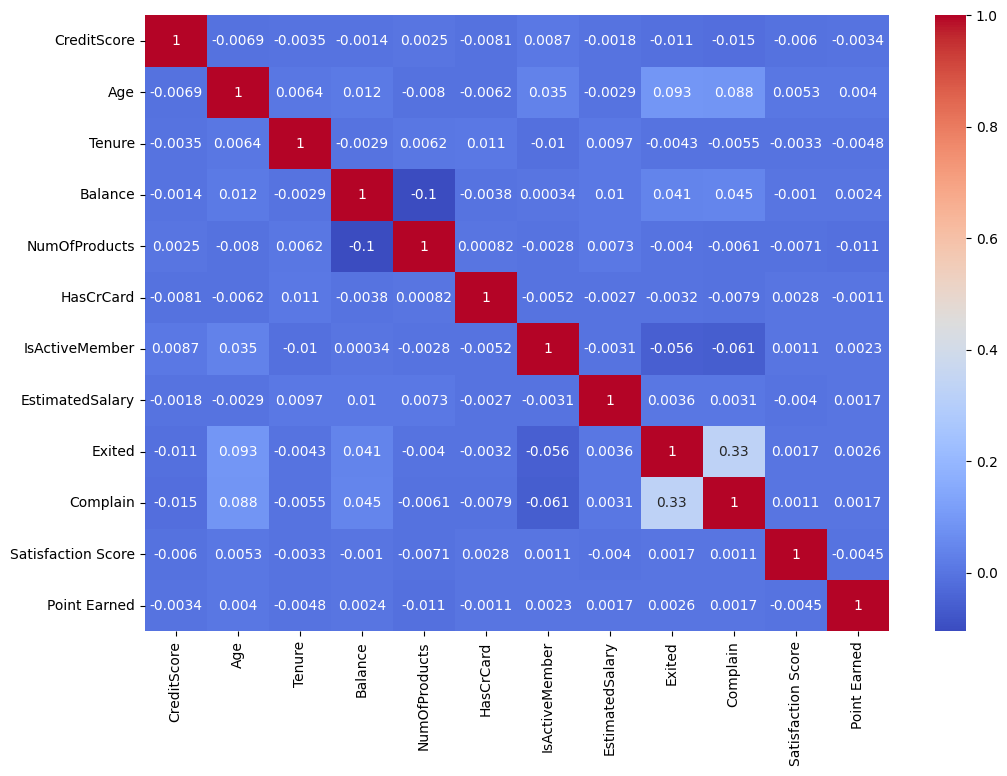

In [ ]:
cor=data.select_dtypes(include='number').corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')

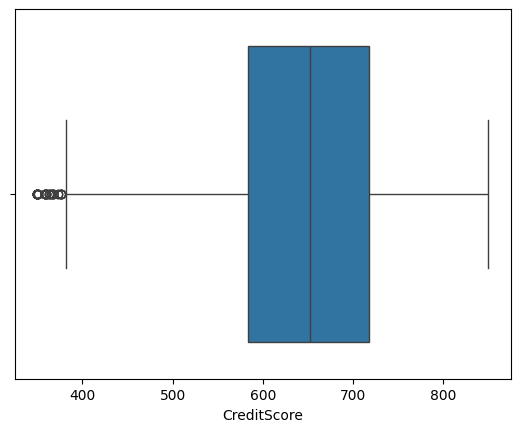

The median is  652.0


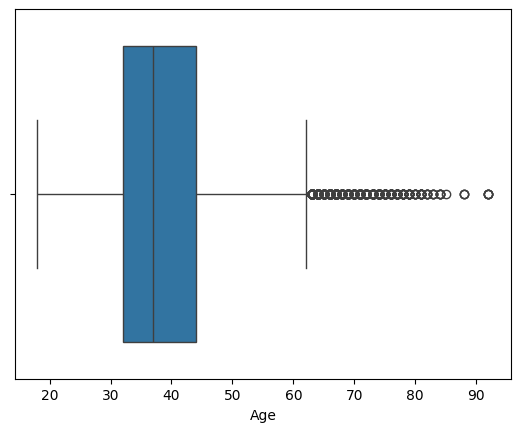

The median is  37.0


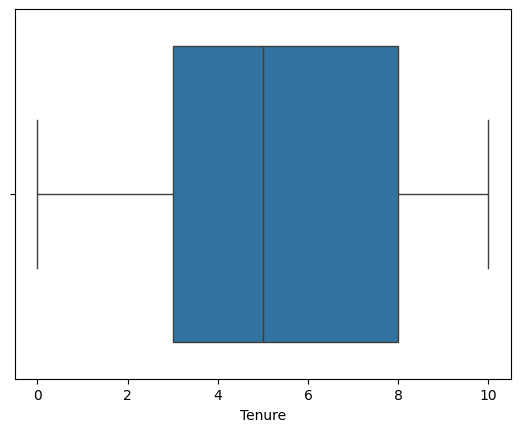

The median is  5.0


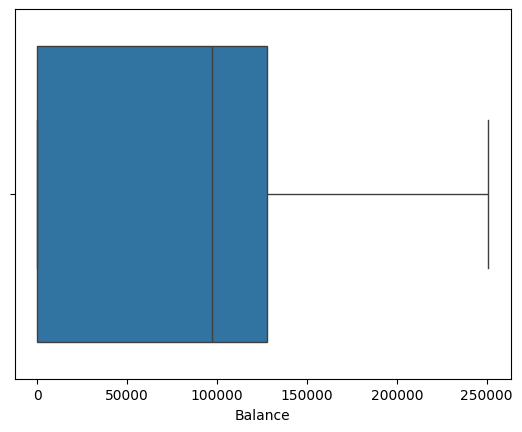

The median is  96877.21


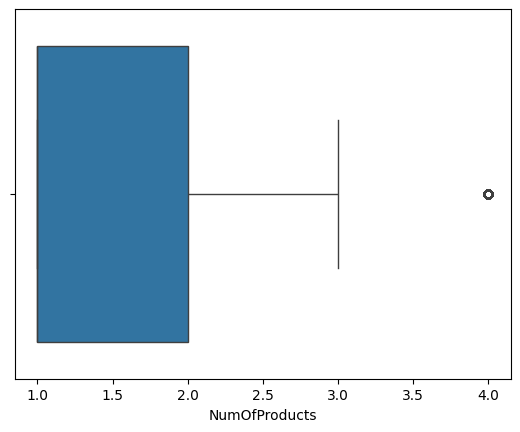

The median is  1.0


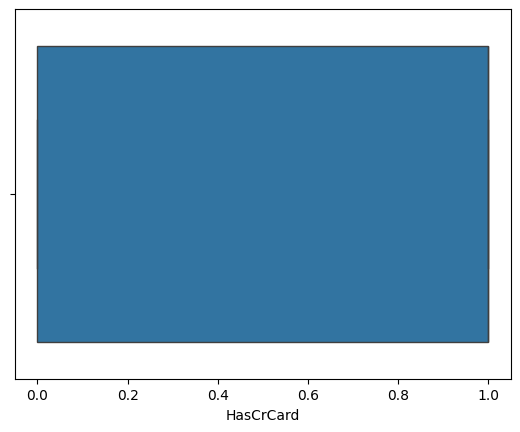

The median is  1.0


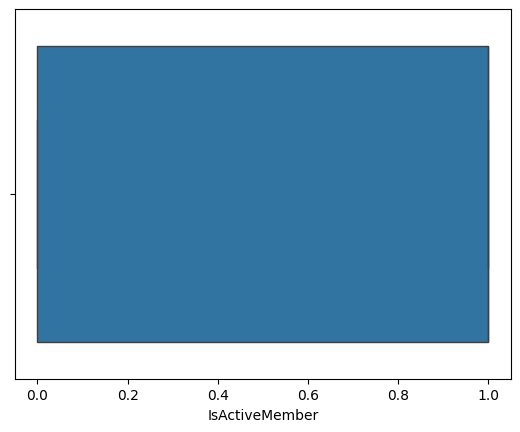

The median is  1.0


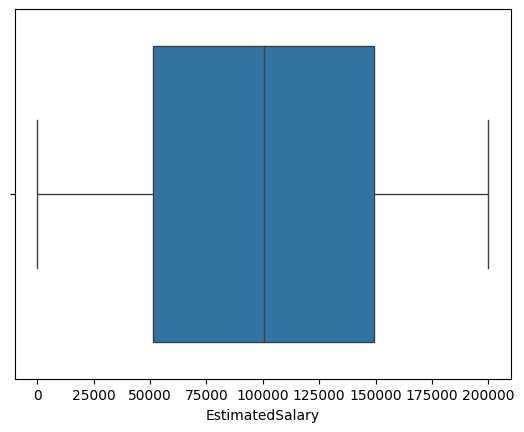

The median is  100350.53


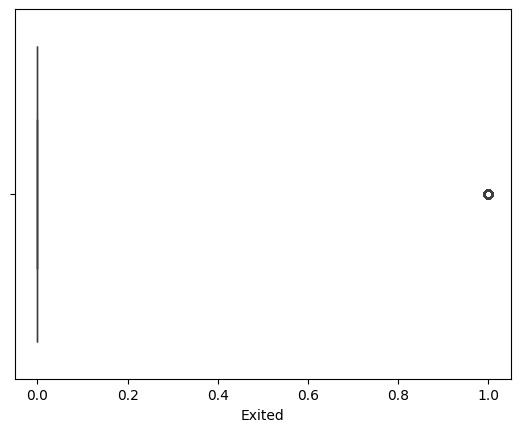

The median is  0.0


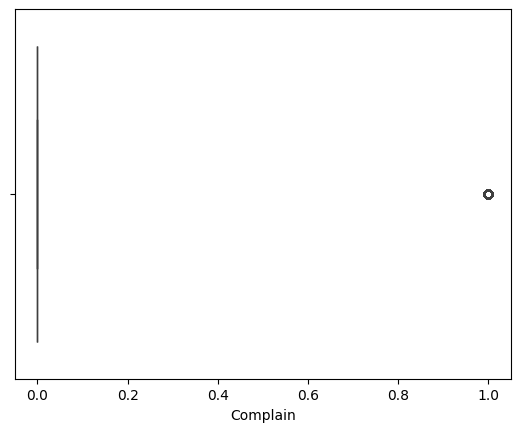

The median is  0.0


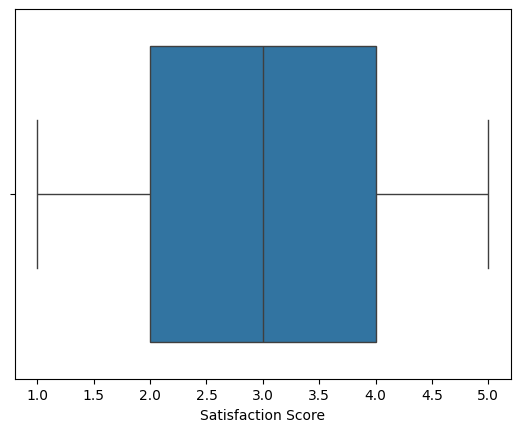

The median is  3.0


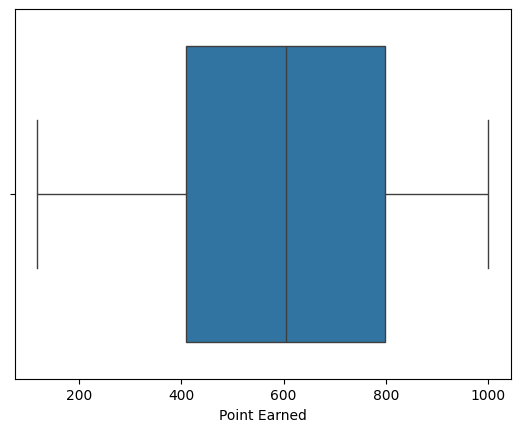

The median is  605.0


In [ ]:
for i in data.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(data=data,x=i)
    plt.show()
    print('The median is ',data[i].median())

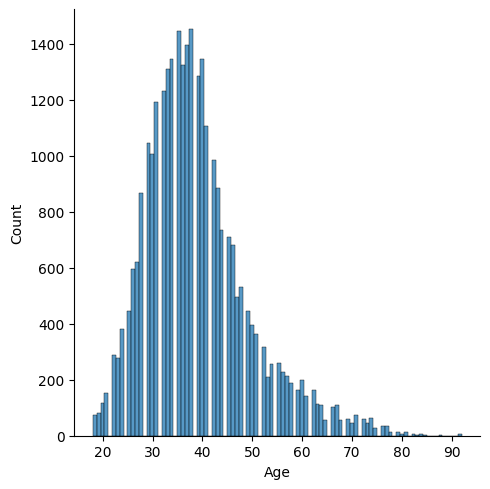

In [ ]:
sns.displot(data['Age'])

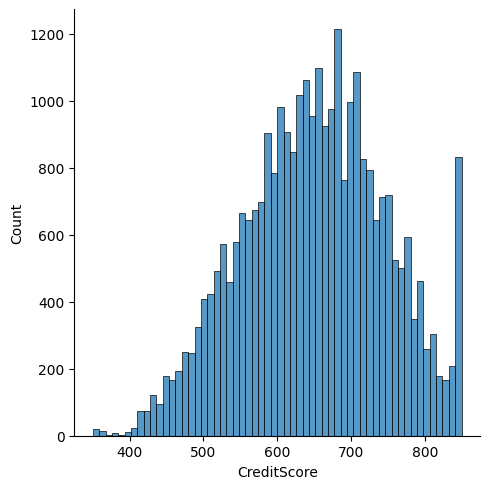

In [ ]:
sns.displot(data['CreditScore'])

In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = []
for value in data['Age']:
    if value < lower_bound or value > upper_bound:
        outliers.append(value)
print("Outliers in the 'Age' column:")
print(outliers)
print(len(outliers))
from collections import Counter
print(Counter(outliers))
print(lower_bound)
print(upper_bound)


Outliers in the 'Age' column:
[66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68, 71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64, 75, 73, 71, 72, 63, 67, 68, 73, 67, 64, 63, 92, 65, 75, 67, 71, 64, 66, 64, 66, 67, 77, 92, 67, 63, 6

Here the outliers of age are normal values, hence will not be handling the outliers

In [ ]:
Q1 = data['CreditScore'].quantile(0.25)
Q3 = data['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = []
for value in data['CreditScore']:
    if value < lower_bound or value > upper_bound:
        outliers.append(value)
print("Outliers in the 'CreditScore' column:")
print(outliers)
print(len(outliers))
print(Counter(outliers))
print(lower_bound)
print(upper_bound)


Outliers in the 'CreditScore' column:
[376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 373, 350, 367, 376, 350, 358, 367, 373, 365, 367, 359, 358, 350, 376, 358, 350, 359, 350, 359, 363, 350, 350, 376, 359, 363, 350, 351, 365, 350, 350, 358]
43
Counter({350: 14, 376: 5, 359: 5, 358: 5, 367: 4, 363: 3, 365: 3, 351: 2, 373: 2})
380.5
920.5


Here the outliers of creditscore are normal values, hence will not be handling the outliers


Percentage of unique categories for Geography:
Geography
France     50.590000
Germany    24.836667
Spain      24.573333
Name: proportion, dtype: float64

Percentage of leavers by Geography:
Geography
France     19.252817
Germany    24.614146
Spain      19.112859
Name: Exited, dtype: float64


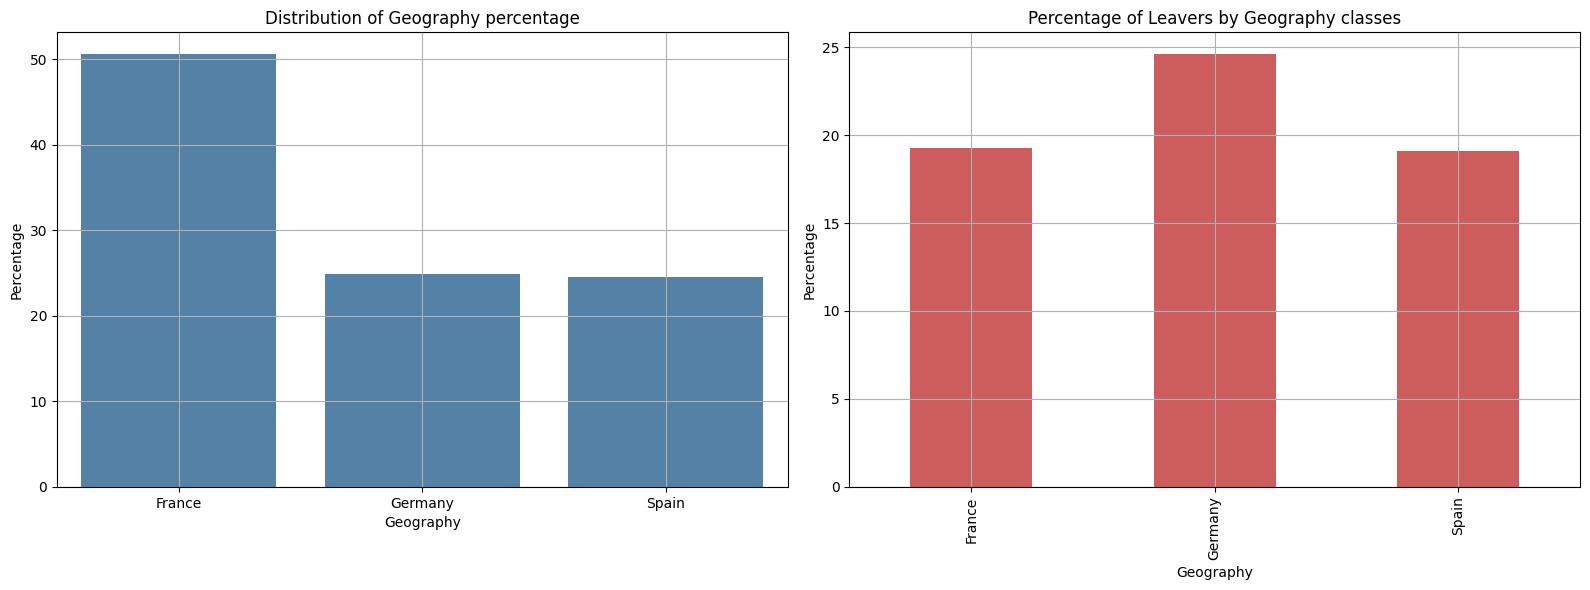


Percentage of unique categories for Gender:
Gender
Male      54.596667
Female    45.403333
Name: proportion, dtype: float64

Percentage of leavers by Gender:
Gender
Male      19.134257
Female    22.252404
Name: Exited, dtype: float64


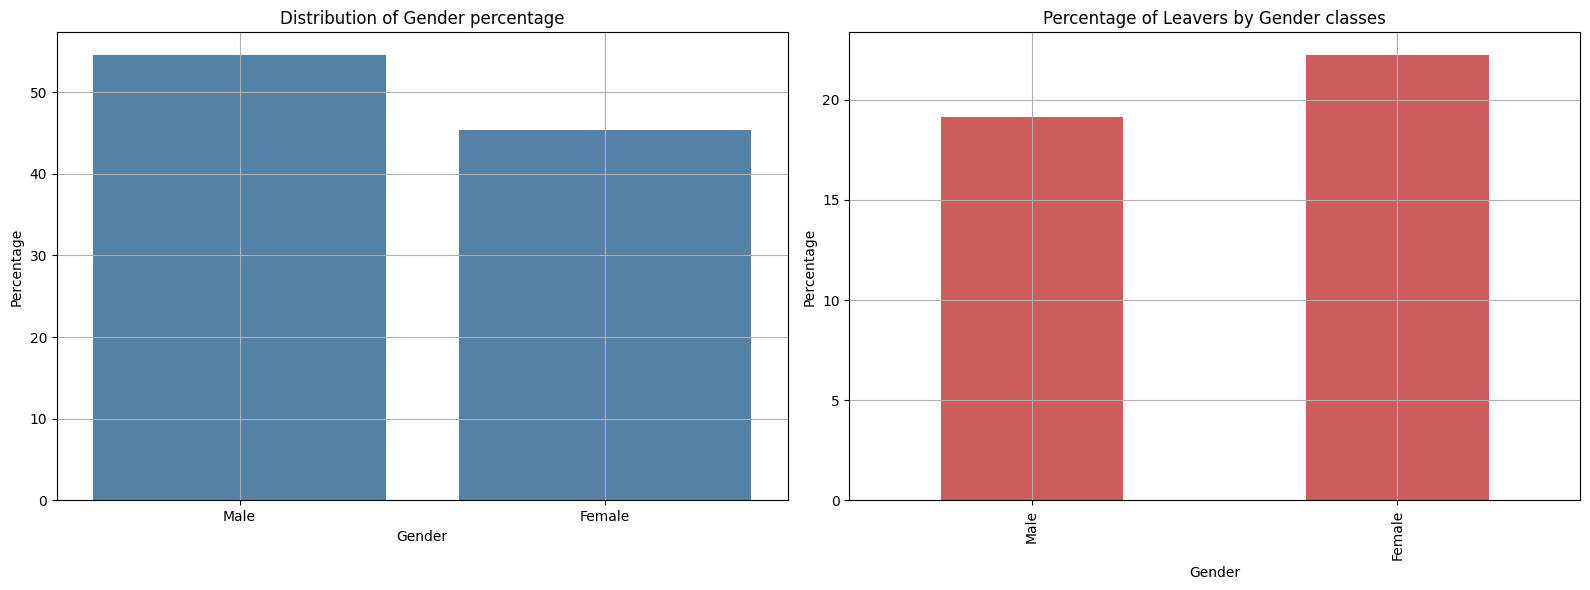


Percentage of unique categories for Tenure:
Tenure
2     10.440000
8     10.430000
1     10.370000
4     10.196667
5     10.076667
7      9.973333
9      9.960000
3      9.956667
6      9.646667
10     4.870000
0      4.080000
Name: proportion, dtype: float64

Percentage of leavers by Tenure:
Tenure
2     21.200511
8     19.590924
1     20.797171
4     20.202681
5     21.137942
7     20.153743
9     21.017403
3     20.857047
6     19.557706
10    21.218344
0     20.751634
Name: Exited, dtype: float64


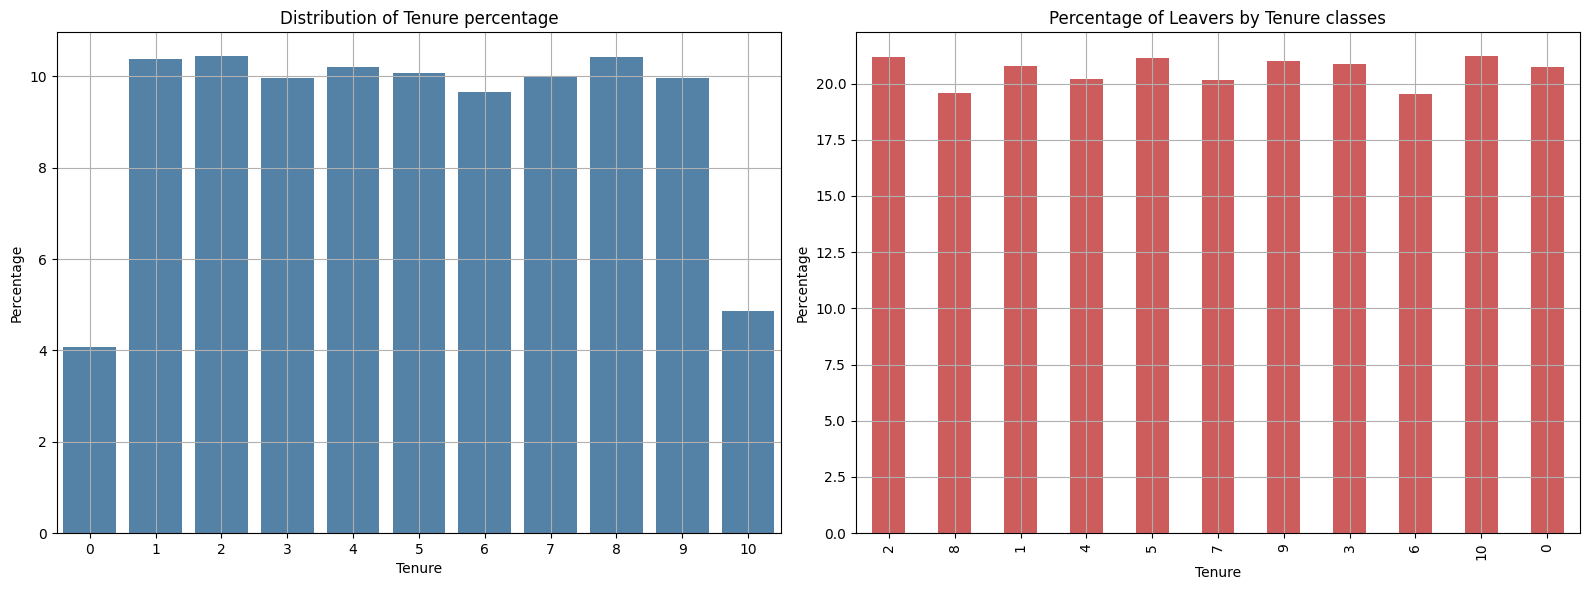


Percentage of unique categories for NumOfProducts:
NumOfProducts
1    50.976667
2    45.890000
3     2.503333
4     0.630000
Name: proportion, dtype: float64

Percentage of leavers by NumOfProducts:
NumOfProducts
1    22.624730
2    16.517760
3    45.406125
4    47.619048
Name: Exited, dtype: float64


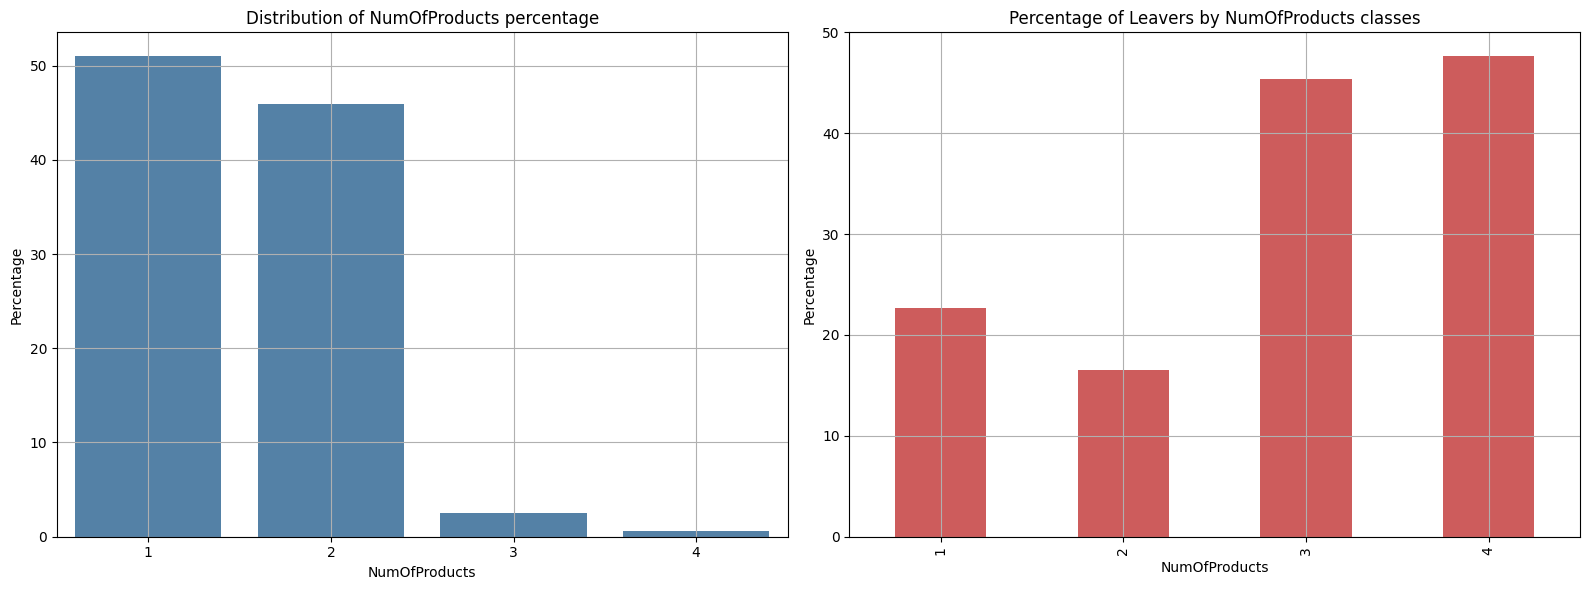


Percentage of unique categories for HasCrCard:
HasCrCard
1    70.393333
0    29.606667
Name: proportion, dtype: float64

Percentage of leavers by HasCrCard:
HasCrCard
1    20.465953
0    20.749831
Name: Exited, dtype: float64


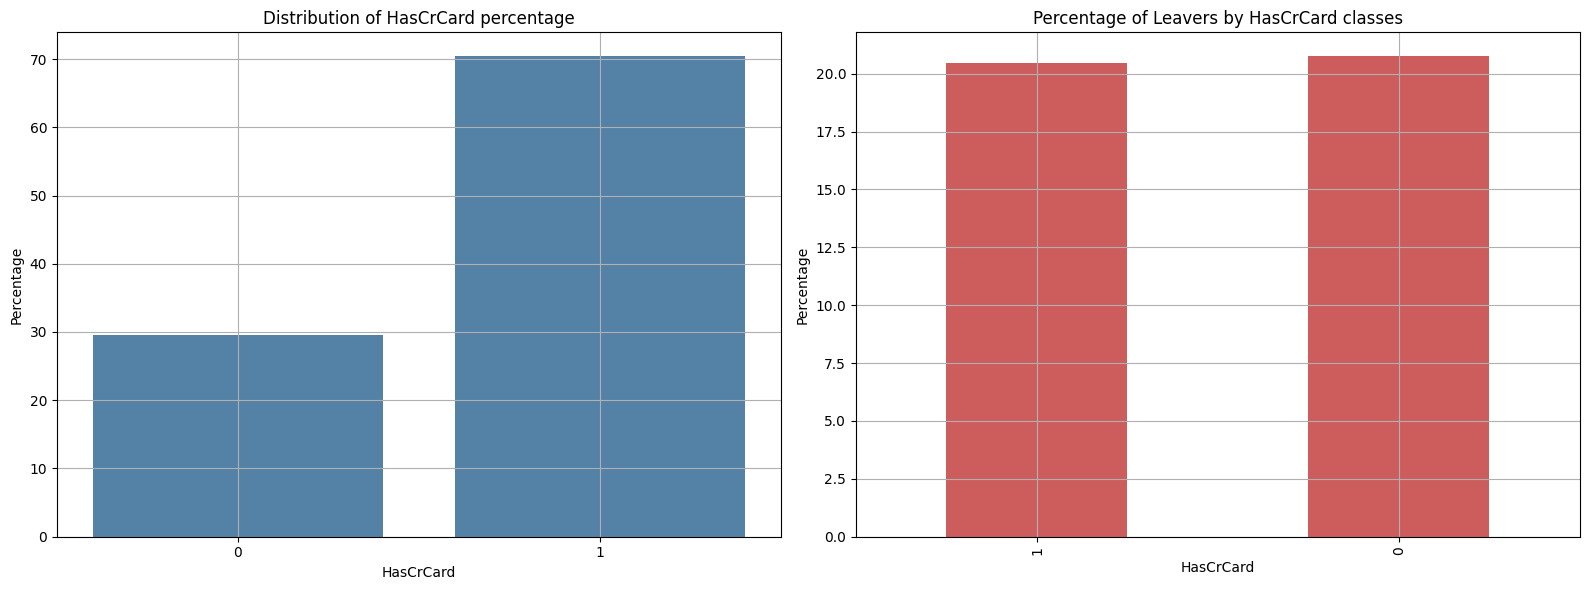


Percentage of unique categories for IsActiveMember:
IsActiveMember
1    52.153333
0    47.846667
Name: proportion, dtype: float64

Percentage of leavers by IsActiveMember:
IsActiveMember
1    18.394478
0    22.899540
Name: Exited, dtype: float64


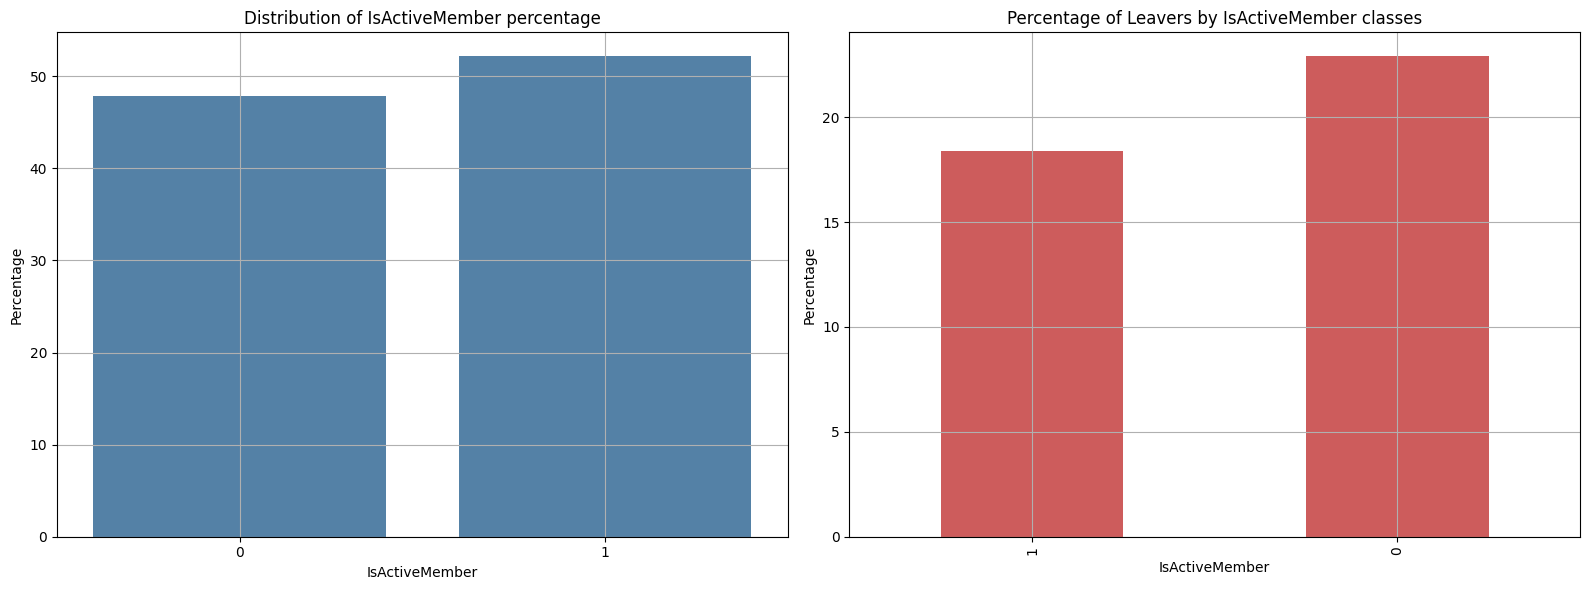


Percentage of unique categories for Exited:
Exited
0    79.45
1    20.55
Name: proportion, dtype: float64

Percentage of leavers by Exited:
Exited
0      0.0
1    100.0
Name: Exited, dtype: float64


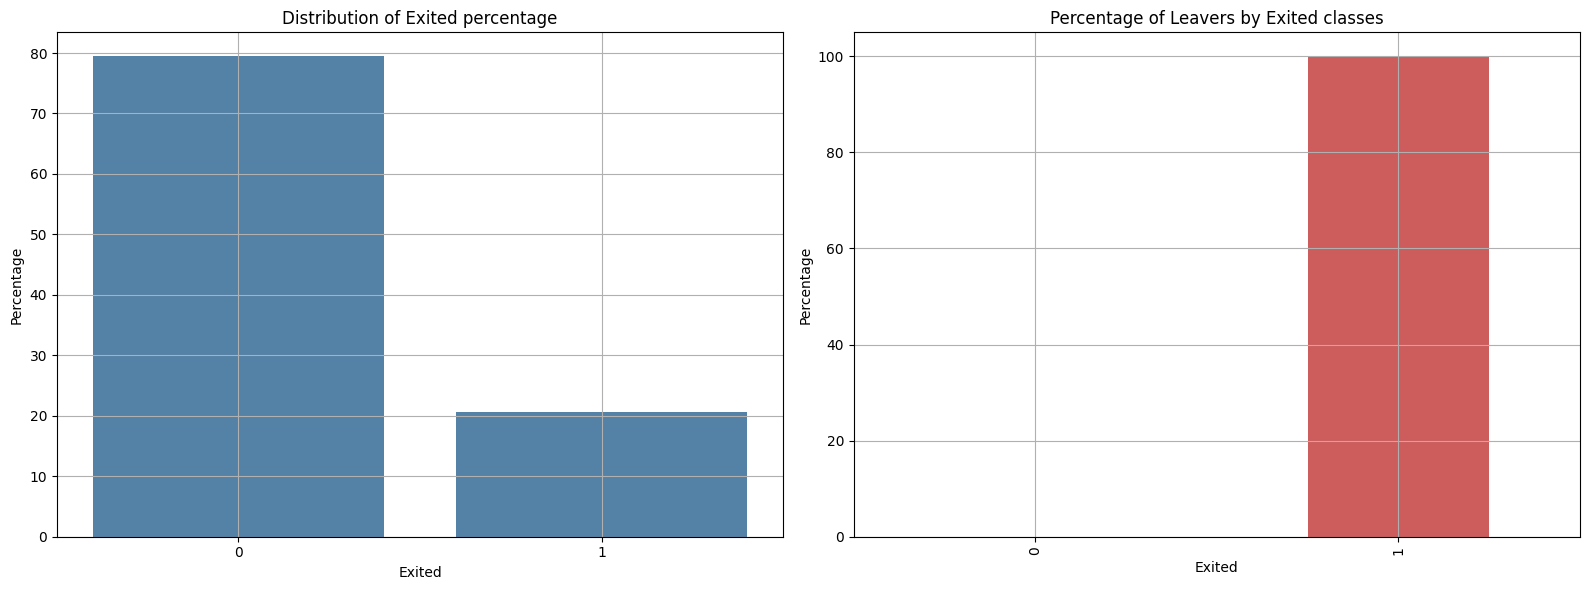


Percentage of unique categories for Complain:
Complain
0    79.65
1    20.35
Name: proportion, dtype: float64

Percentage of leavers by Complain:
Complain
0    13.810421
1    46.928747
Name: Exited, dtype: float64


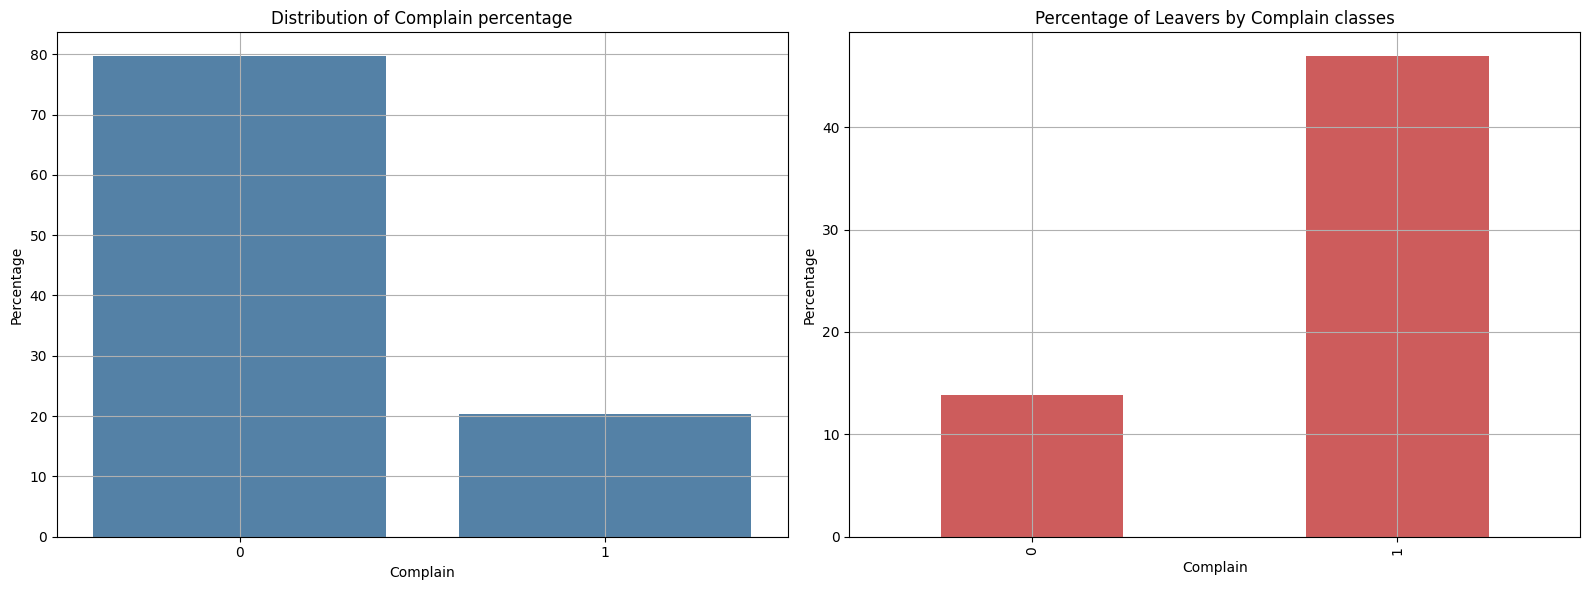


Percentage of unique categories for Satisfaction Score:
Satisfaction Score
5    20.313333
2    20.193333
3    20.190000
4    19.866667
1    19.436667
Name: proportion, dtype: float64

Percentage of leavers by Satisfaction Score:
Satisfaction Score
5    20.479160
2    21.442720
3    19.811788
4    21.006711
1    19.996570
Name: Exited, dtype: float64


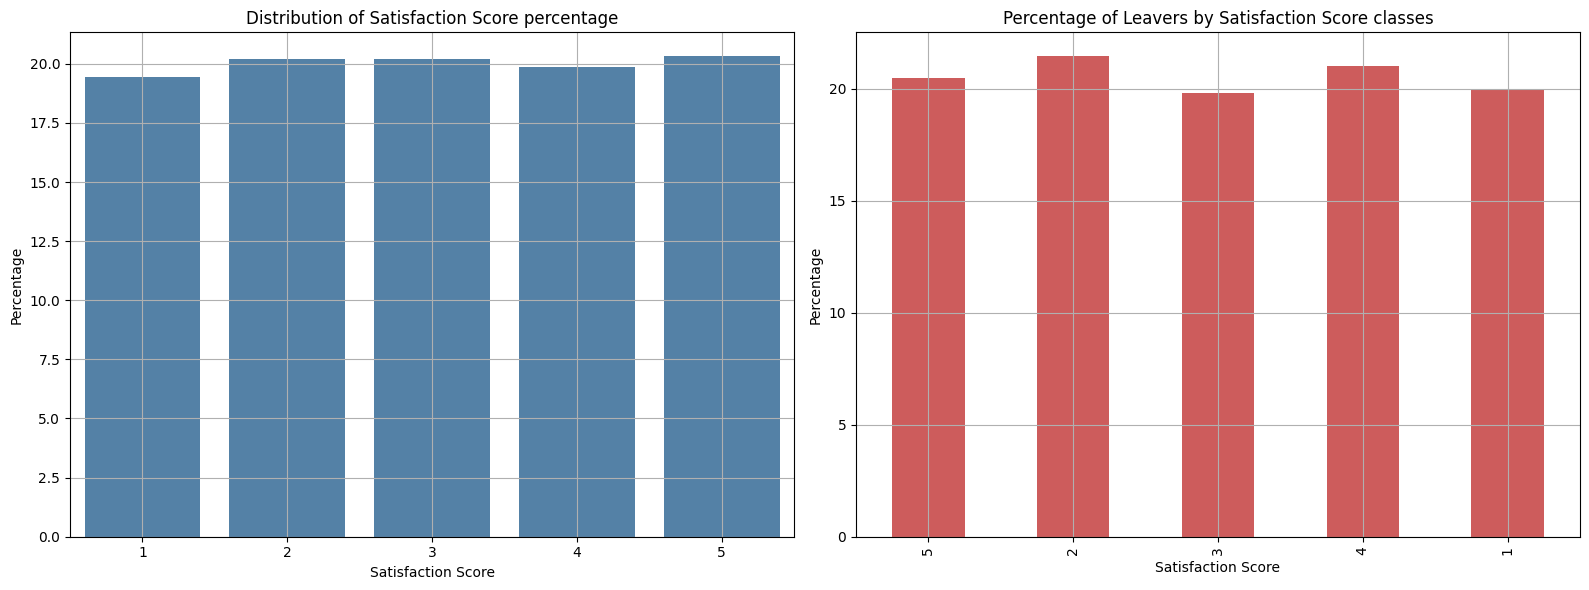


Percentage of unique categories for Card Type:
Card Type
DIAMOND     25.313333
SILVER      25.213333
GOLD        24.926667
PLATINUM    24.546667
Name: proportion, dtype: float64

Percentage of leavers by Card Type:
Card Type
DIAMOND     20.805899
SILVER      20.967742
GOLD        20.219310
PLATINUM    20.192830
Name: Exited, dtype: float64


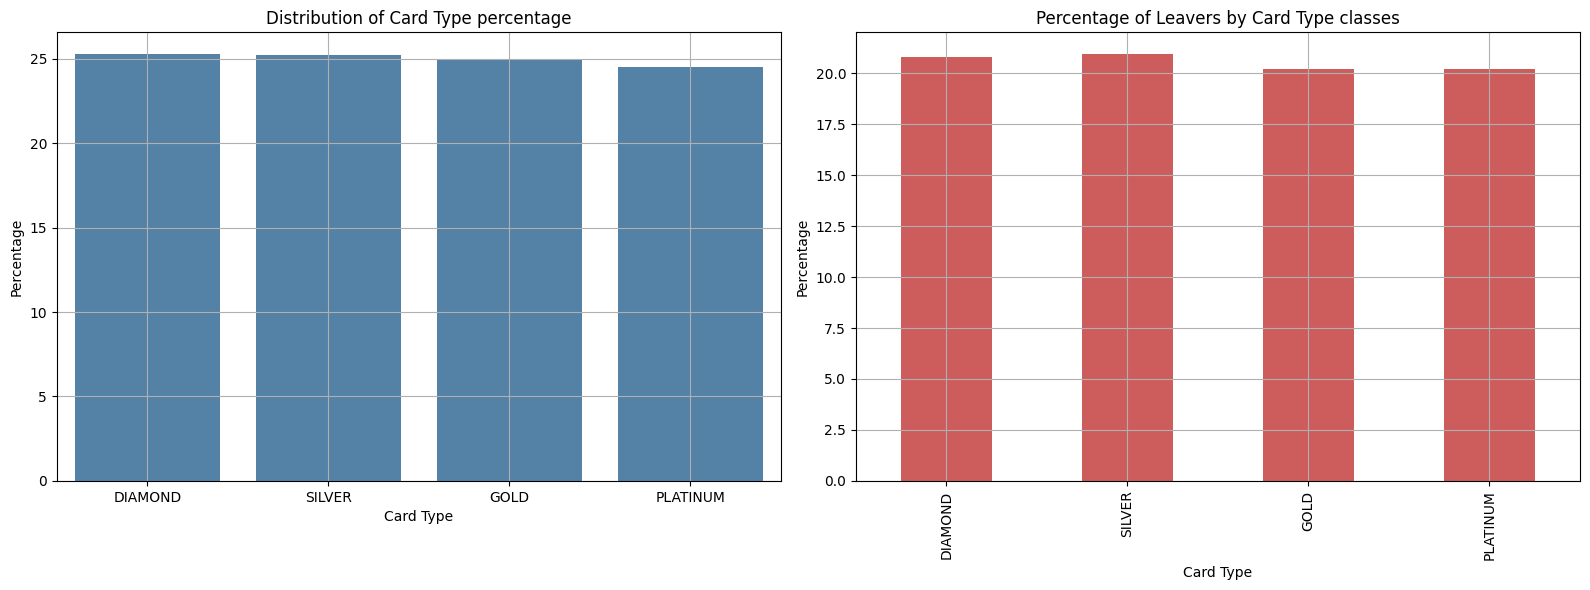

In [ ]:
for feature in ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']:
    value_counts = (data[feature].value_counts(normalize=True)) * 100
    print(f"\nPercentage of unique categories for {feature}:")
    print(value_counts)

    leavers_pct = data.groupby(feature)['Exited'].mean() * 100
    leavers_pct = leavers_pct.reindex(value_counts.index, fill_value=0)
    print(f"\nPercentage of leavers by {feature}:")
    print(leavers_pct)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=False)

    ax_bar = axes[0]

    # Calculate percentages manually
    counts = data[feature].value_counts(normalize=True).mul(100).reindex(value_counts.index)
    sns.barplot(x=counts.index, y=counts.values, ax=ax_bar, color='steelblue') # use sns.countplot with stat argument = 'percent' if you use 0.13 version or later
    ax_bar.set_title(f'Distribution of {feature} percentage')
    ax_bar.set_xlabel(feature)
    ax_bar.set_ylabel('Percentage')
    ax_bar.grid(True)

    leavers_pct.plot(kind='bar', ax=axes[1], color='indianred')
    axes[1].set_title(f'Percentage of Leavers by {feature} classes')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Percentage')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Feature Engineering

In [ ]:
# now we will consider the Balance feature and analyze it regarding the large portion of the data around zero
# dividing the feature in ranges to get the customers in each range by thresholds
thresholds = [0, 50000, 100000, 150000, 200000, 250000]
total_customers = data.shape[0]

zero_balance_count = data[data['Balance'] == 0].shape[0]
zero_balance_percentage = (zero_balance_count / total_customers) * 100
print(f'Number of customers with a balance of 0: {zero_balance_count} ({zero_balance_percentage:.2f}%)')

highest_balance_count = data[data['Balance'] > 250000].shape[0]
highest_balance_percentage = (highest_balance_count / total_customers) * 100
print(f'Number of customers with a balance over 250000: {highest_balance_count} ({highest_balance_percentage:.2f}%)')

for i in range(len(thresholds) - 1):
    lower_threshold = thresholds[i]
    upper_threshold = thresholds[i + 1]
    count = data[(data['Balance'] > lower_threshold) & (data['Balance'] <= upper_threshold)].shape[0]
    percentage = (count / total_customers) * 100
    print(f'Number of customers within the range {lower_threshold} and {upper_threshold}: {count} ({percentage:.2f}%)')

Number of customers with a balance of 0: 10940 (36.47%)
Number of customers with a balance over 250000: 2 (0.01%)
Number of customers within the range 0 and 50000: 227 (0.76%)
Number of customers within the range 50000 and 100000: 4497 (14.99%)
Number of customers within the range 100000 and 150000: 11392 (37.97%)
Number of customers within the range 150000 and 200000: 2848 (9.49%)
Number of customers within the range 200000 and 250000: 94 (0.31%)


In [ ]:
low_balance = data[(data['Balance'] > 0) & (data['Balance'] <= 50000)]

low_churn_count = low_balance[low_balance['Exited'] == 1].shape[0]
low_total_count = low_balance.shape[0]
low_bal_churn_perc = low_churn_count / low_total_count

print(f'Total number of customers with low balance: {low_total_count}')
print(f'Number of churned customers with low balance: {low_churn_count}')
print(f'Number of non-churned customers with low balance: {low_total_count - low_churn_count}')

print(f'Percentage of churned customers with low balance {low_bal_churn_perc * 100:.2f}%')

Total number of customers with low balance: 227
Number of churned customers with low balance: 60
Number of non-churned customers with low balance: 167
Percentage of churned customers with low balance 26.43%


Despite the number of customers in this portion is less than 1% but their churn rate is high (26.43%) compared to the overall churn rate (20.6%)

In [ ]:
zero_balance = data[data['Balance'] == 0]

zero_churn_count = zero_balance[zero_balance['Exited'] == 1].shape[0]
zero_total_count = zero_balance.shape[0]
zero_bal_churn_perc = zero_churn_count / zero_total_count

print(f'Total number of customers with zero balance: {zero_total_count}')
print(f'Number of churned customers with zero balance: {zero_churn_count}')
print(f'Number of non-churned customers with zero balance: {zero_total_count - zero_churn_count}')

print(f'Percentage of churned customers with zero balance {zero_bal_churn_perc * 100:.2f}%')

Total number of customers with zero balance: 10940
Number of churned customers with zero balance: 2008
Number of non-churned customers with zero balance: 8932
Percentage of churned customers with zero balance 18.35%


Despite the customers with zero balance are the largest portion of the total data but the churn rate for this portion is somehow small (18.35%) compared to the overall churn rate 20.6%

In [ ]:
high_balance = data[data['Balance'] > 50000]

high_churn_count = high_balance[high_balance['Exited'] == 1].shape[0]
high_total_count = high_balance.shape[0]
high_bal_churn_perc = high_churn_count / high_total_count

print(f'Total number of customers with high balance: {high_total_count}')
print(f'Number of churned customers with high balance: {high_churn_count}')
print(f'Number of non-churned customers with high balance: {high_total_count - high_churn_count}')

print(f'Percentage of churned customers with high balance {high_bal_churn_perc * 100:.2f}%')

Total number of customers with high balance: 18833
Number of churned customers with high balance: 4097
Number of non-churned customers with high balance: 14736
Percentage of churned customers with high balance 21.75%


In [ ]:
def categorize_balance(balance):
    if balance <= 0:
        return 'Zero'
    elif balance <= 50000:
        return '0-50K'
    else:
        return '50K+'

data['Balance_Category'] = data['Balance'].apply(categorize_balance)

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Balance_Category'],
      dtype='object')

In [ ]:
data=data.drop(['Balance'],axis=1)

In [ ]:
data['Balance_Category'] = data['Balance_Category'].astype('object')

In [ ]:
data['EstimatedSalary'].min()

11.58

In [ ]:
Q1 = data['EstimatedSalary'].quantile(0.25)
Q3 = data['EstimatedSalary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['EstimatedSalary'] < lower_bound) | (data['EstimatedSalary'] > upper_bound)]

# Print or further analyze the outliers
print("Outliers in EstimatedSalary:")
outliers
print(lower_bound)

Outliers in EstimatedSalary:
-95961.41500000002


In [ ]:
data[data['EstimatedSalary']<1000]

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Balance_Category
149,416,France,Male,32,0,2,0,1,878.87,0,0,5,GOLD,884,Zero
195,807,France,Male,35,3,1,1,1,600.36,0,0,3,SILVER,861,50K+
393,556,Spain,Male,38,8,2,0,0,417.41,1,1,3,GOLD,632,Zero
396,557,France,Male,33,3,1,1,1,371.05,0,0,5,SILVER,362,50K+
559,850,Spain,Female,70,5,1,1,1,705.18,0,0,1,DIAMOND,283,Zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28470,600,France,Male,37,6,2,1,1,555.28,0,0,4,GOLD,222,50K+
28533,591,France,Female,30,7,2,1,0,371.05,0,1,5,SILVER,246,50K+
29244,659,Spain,Male,36,1,2,1,0,824.00,0,0,3,SILVER,252,Zero
29514,655,France,Male,52,2,2,1,0,96.27,0,1,4,PLATINUM,417,Zero


In [ ]:
# prompt: bin estimated salary and show value counts

import pandas as pd
# Define bins for EstimatedSalary
bins = [0, 50000, 100000, 150000, 200000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k']

# Create a new column 'Salary_Range' based on the bins
data['Salary_Range'] = pd.cut(data['EstimatedSalary'], bins=bins, labels=labels, right=False)

# Display value counts for the new 'Salary_Range' column
print(data['Salary_Range'].value_counts())


Salary_Range
100k-150k    7687
50k-100k     7646
150k-200k    7357
0-50k        7310
Name: count, dtype: int64


In [ ]:
bins = [0, 50000, 100000, 150000, 200000]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K']
data['EstimatedSalary_Bins'] = pd.cut(data['EstimatedSalary'], bins=bins, labels=labels, right=False)

In [ ]:
data.drop(['EstimatedSalary'],axis=1,inplace=True)

## EDA continued

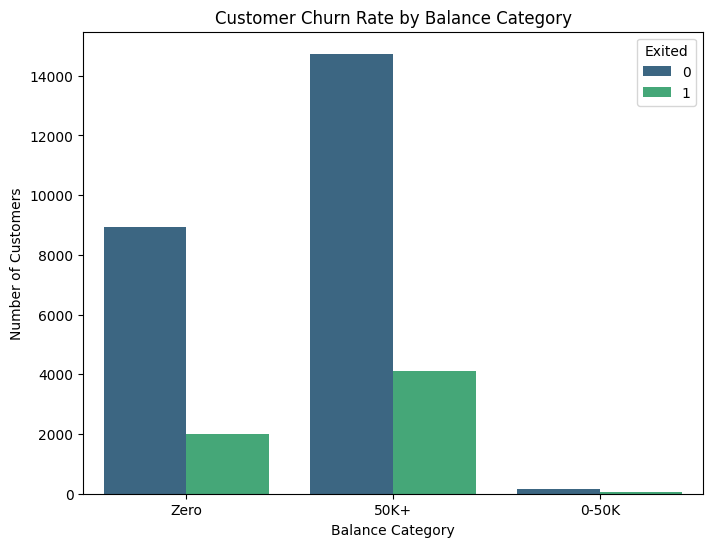

,Exited
Balance_Category,
0-50K,0.264317
50K+,0.217544
Zero,0.183547


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Balance_Category', hue='Exited', data=data, palette='viridis')
plt.title('Customer Churn Rate by Balance Category')
plt.xlabel('Balance Category')
plt.ylabel('Number of Customers')
plt.show()

# Further analysis: calculate churn rate within each bin
churn_rates = data.groupby('Balance_Category')['Exited'].mean()
churn_rates

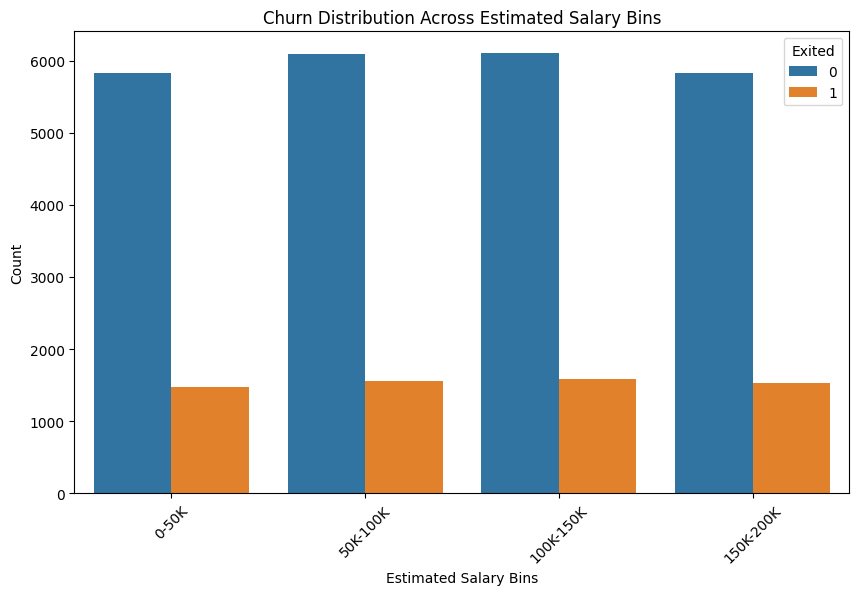

,Exited
EstimatedSalary_Bins,
0-50K,0.202599
50K-100K,0.204028
100K-150K,0.206583
150K-200K,0.208781


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EstimatedSalary_Bins', hue='Exited', data=data)
plt.title('Churn Distribution Across Estimated Salary Bins')
plt.xlabel('Estimated Salary Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Further analysis: calculate churn rate within each bin
churn_rates = data.groupby('EstimatedSalary_Bins')['Exited'].mean()
churn_rates


In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'Balance_Category',
       'Salary_Range', 'EstimatedSalary_Bins'],
      dtype='object')

# Encoding and Scaling

In [ ]:
data.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
col='Balance_Category'
enc_df = pd.DataFrame(enc.fit_transform(data[['Balance_Category']]).toarray())

enc_df = enc_df.rename(columns={0: 'Balance_Category_0-50K', 1: 'Balance_Category_50K+', 2: 'Balance_Category_Zero'})

data = data.join(enc_df)

data = data.drop('Balance_Category', axis=1)


In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(data[['Geography']]).toarray())

enc_df = enc_df.rename(columns={0: 'Geography_France', 1: 'Geography_Germany', 2: 'Geography_Spain'})

data = data.join(enc_df)

data = data.drop('Geography', axis=1)


In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(data[['Card Type']]).toarray())

enc_df = enc_df.rename(columns={0: 'Card_Type_Gold', 1: 'Card_Type_Platinum', 2: 'Card_Type_Silver', 3: 'Card_Type_Diamond'})

data = data.join(enc_df)

data = data.drop('Card Type', axis=1)


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc_df = pd.DataFrame(enc.fit_transform(data[['EstimatedSalary_Bins']]))

enc_df = enc_df.rename(columns={0: 'EstimatedSalary_Bins_0-50K',
                                1: 'EstimatedSalary_Bins_100K-150K',
                                2: 'EstimatedSalary_Bins_150K-200K',
                                3: 'EstimatedSalary_Bins_50K-100K'})

data = data.join(enc_df)

# Drop the original 'EstimatedSalary_Bins' column
data = data.drop('EstimatedSalary_Bins', axis=1)
data.drop(['Salary_Range'],axis=1,inplace=True)


In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,...,Geography_Germany,Geography_Spain,Card_Type_Gold,Card_Type_Platinum,Card_Type_Silver,Card_Type_Diamond,EstimatedSalary_Bins_0-50K,EstimatedSalary_Bins_100K-150K,EstimatedSalary_Bins_150K-200K,EstimatedSalary_Bins_50K-100K
0,619,0,42,2,1,1,1,1,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,608,0,41,1,1,0,1,0,1,3,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,502,0,42,8,3,1,0,1,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,699,0,39,1,2,0,0,0,0,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,850,0,43,2,1,1,1,0,0,5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
scale_col=['CreditScore','Age','Tenure','Point Earned','NumOfProducts','Satisfaction Score']
scaler=MinMaxScaler()
data[scale_col]=scaler.fit_transform(data[scale_col])

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,...,Geography_Germany,Geography_Spain,Card_Type_Gold,Card_Type_Platinum,Card_Type_Silver,Card_Type_Diamond,EstimatedSalary_Bins_0-50K,EstimatedSalary_Bins_100K-150K,EstimatedSalary_Bins_150K-200K,EstimatedSalary_Bins_50K-100K
0,0.538,0,0.324324,0.2,0.000000,1,1,1,1,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.516,0,0.310811,0.1,0.000000,0,1,0,1,0.50,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.304,0,0.324324,0.8,0.666667,1,0,1,1,0.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.698,0,0.283784,0.1,0.333333,0,0,0,0,1.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000,0,0.337838,0.2,0.000000,1,1,0,0,1.00,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Balance_Category_0-50K', 'Balance_Category_50K+',
       'Balance_Category_Zero', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Card_Type_Gold', 'Card_Type_Platinum',
       'Card_Type_Silver', 'Card_Type_Diamond', 'EstimatedSalary_Bins_0-50K',
       'EstimatedSalary_Bins_100K-150K', 'EstimatedSalary_Bins_150K-200K',
       'EstimatedSalary_Bins_50K-100K'],
      dtype='object')

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,precision_recall_curve, f1_score,roc_auc_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Balance_Category_0-50K', 'Balance_Category_50K+',
       'Balance_Category_Zero', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Card_Type_Gold', 'Card_Type_Platinum',
       'Card_Type_Silver', 'Card_Type_Diamond', 'EstimatedSalary_Bins_0-50K',
       'EstimatedSalary_Bins_100K-150K', 'EstimatedSalary_Bins_150K-200K',
       'EstimatedSalary_Bins_50K-100K'],
      dtype='object')

In [ ]:
x = data.drop('Exited', axis=1)
y = data['Exited']

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
y_resampled.value_counts()

,count
Exited,
1,23835
0,23835


In [ ]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

## Logistic Regression

Logistic Regression Performance:
Accuracy: 0.6398153975246487
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.84      0.70      4727
           1       0.74      0.44      0.55      4807

    accuracy                           0.64      9534
   macro avg       0.67      0.64      0.63      9534
weighted avg       0.67      0.64      0.63      9534

Precision: 0.7368057951017593
F1 score: 0.5543732156760965
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.84      0.70      4727
           1       0.74      0.44      0.55      4807

    accuracy                           0.64      9534
   macro avg       0.67      0.64      0.63      9534
weighted avg       0.67      0.64      0.63      9534

ROC-AUC Score: 0.6414694141173168


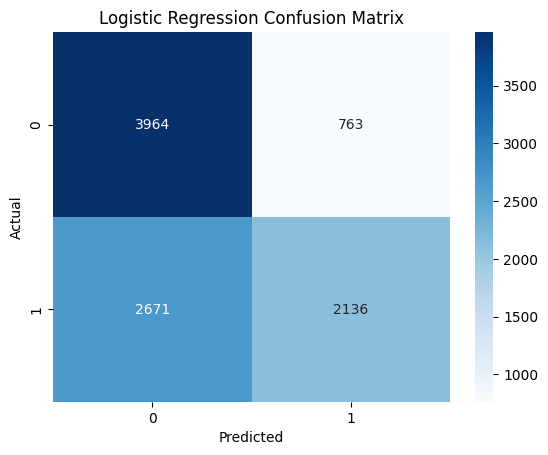

In [ ]:
log_model=LogisticRegression(random_state=42)
log_model.fit(x_train,y_train)
log_pred=log_model.predict(x_test)
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))
print('Precision:',precision_score(y_test,log_pred))
print('F1 score:',f1_score(y_test,log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))
print('ROC-AUC Score:',roc_auc_score(y_test,log_pred))
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

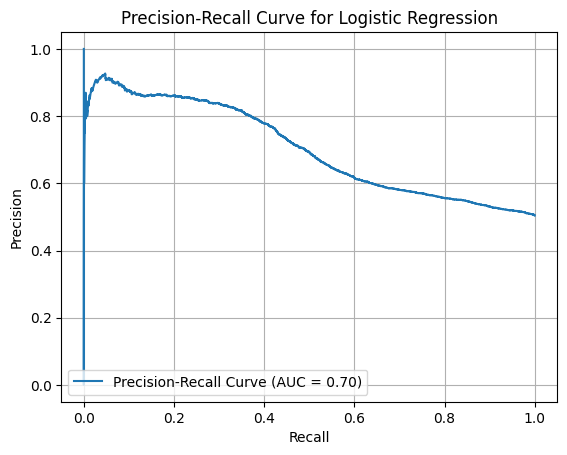

In [ ]:
y_probs = log_model.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

auc_lr = auc(recall, precision)

plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_lr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


## Random Forest

Random Forest Performance:
Accuracy: 0.8011327879169289
Precision: 0.8876165113182424
F1 score: 0.7785564120532585
ROC-AUC Score: 0.8020447315896458
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82      4727
           1       0.89      0.69      0.78      4807

    accuracy                           0.80      9534
   macro avg       0.82      0.80      0.80      9534
weighted avg       0.82      0.80      0.80      9534



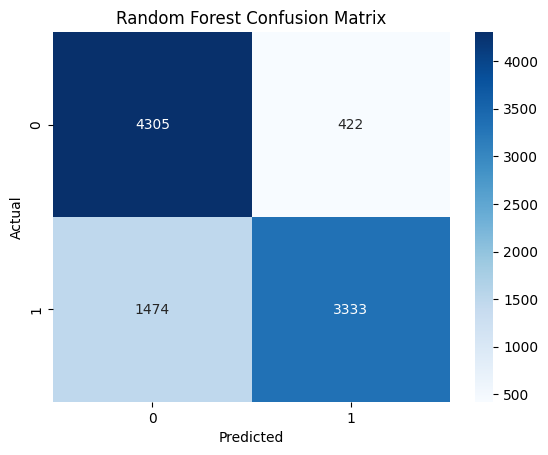

In [ ]:
rf_model=RandomForestClassifier(max_depth=10,n_estimators=100,criterion='entropy',min_samples_split=5,random_state=42)
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
# Evaluate Random Forest Classifier
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print('Precision:',precision_score(y_test,rf_pred))
print('F1 score:',f1_score(y_test,rf_pred))
print('ROC-AUC Score:',roc_auc_score(y_test,rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

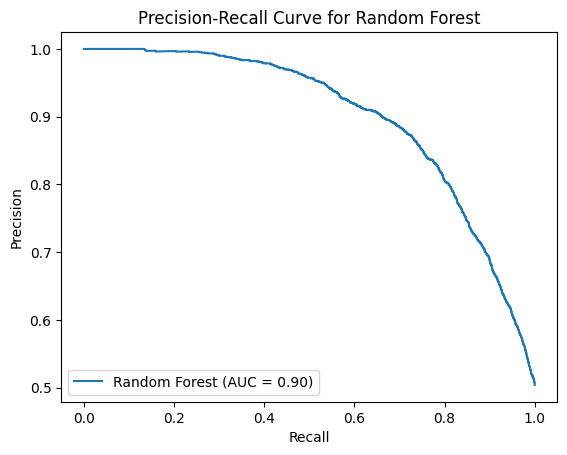

In [ ]:
rf_probs = rf_model.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, rf_probs)

pr_auc_rf = auc(recall, precision)

plt.plot(recall, precision, label=f'Random Forest (AUC = {pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='lower left')
plt.show()

## XG Boost

XGBoost Performance:
Accuracy: 0.8778057478498007
Precision: 0.9454500978473581
F1 score: 0.8690275435637999
ROC AUC Score: 0.8784299912743602
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4727
           1       0.95      0.80      0.87      4807

    accuracy                           0.88      9534
   macro avg       0.89      0.88      0.88      9534
weighted avg       0.89      0.88      0.88      9534



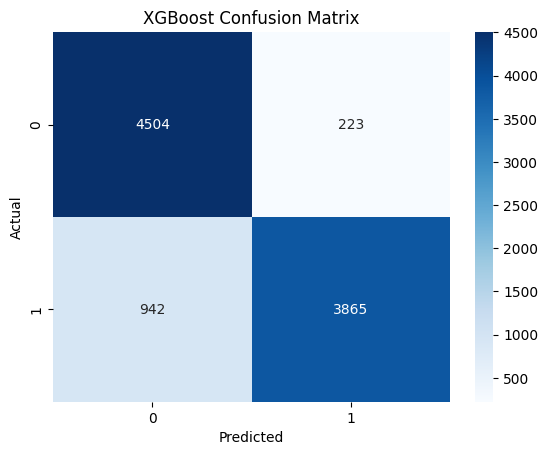

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)
xgb_pred= xgb_model.predict(x_test)
# Evaluate XGBoost Classifier
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:",precision_score(y_test, xgb_pred))
print('F1 score:',f1_score(y_test,xgb_pred))
print('ROC AUC Score:',roc_auc_score(y_test,xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

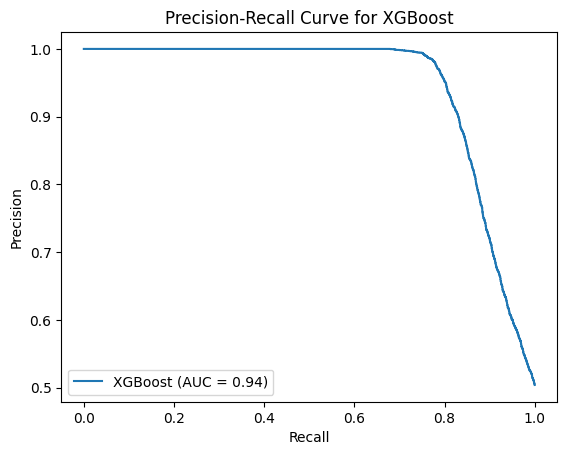

In [ ]:
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, xgb_probs)

pr_auc_xgb = auc(recall, precision)

plt.plot(recall, precision, label=f'XGBoost (AUC = {pr_auc_xgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc='lower left')
plt.show()

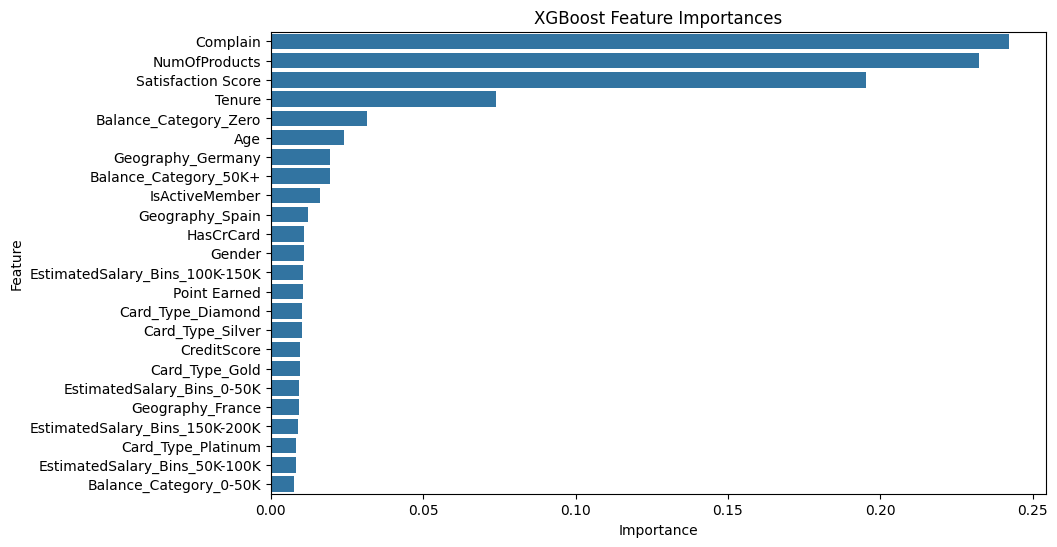

In [ ]:
importances = xgb_model.feature_importances_
feature_names = x_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## SVM

SVM Performance:
Accuracy: 0.6433815817075729
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.87      0.71      4727
           1       0.76      0.42      0.54      4807

    accuracy                           0.64      9534
   macro avg       0.68      0.65      0.63      9534
weighted avg       0.68      0.64      0.63      9534



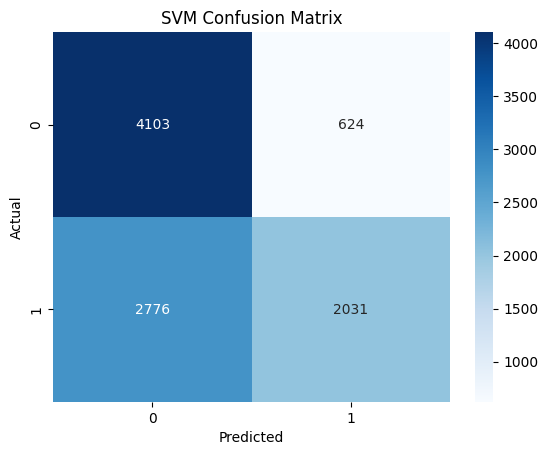

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
# Evaluate SVM Classifier
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

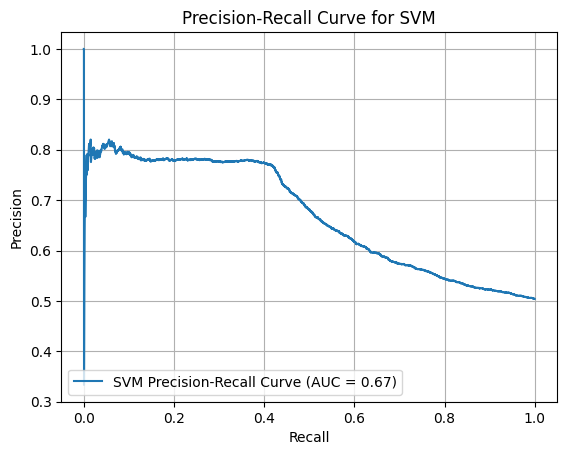

In [ ]:
try:
    svm_probs = svm_model.predict_proba(x_test)[:, 1]
except AttributeError:
    svm_probs = svm_model.decision_function(x_test)
    from sklearn.calibration import CalibratedClassifierCV
    svm_model_calibrated = CalibratedClassifierCV(svm_model, method="sigmoid", cv="prefit")  # Use 'prefit' since the model is already trained
    svm_model_calibrated.fit(x_train,y_train)
    svm_probs = svm_model_calibrated.predict_proba(x_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, svm_probs)

auc_svm = auc(recall, precision)

plt.plot(recall, precision, label=f'SVM Precision-Recall Curve (AUC = {auc_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


## Gradient Boosting

Gradient Boosting Performance:
Accuracy: 0.8505349276274387
Precision: 0.9231731731731732
F1 score: 0.8381233670339657
ROC AUC Score: 0.8512382271306005
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      4727
           1       0.92      0.77      0.84      4807

    accuracy                           0.85      9534
   macro avg       0.86      0.85      0.85      9534
weighted avg       0.86      0.85      0.85      9534



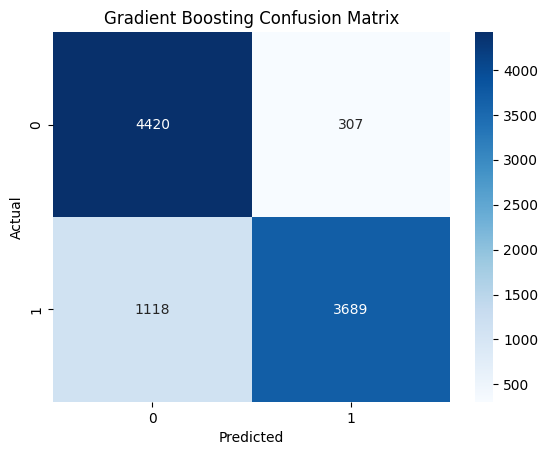

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(x_train, y_train)

gb_pred = gb_model.predict(x_test)
#Evaluate Gradient Boosting
print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print('Precision:',precision_score(y_test,gb_pred))
print('F1 score:',f1_score(y_test,gb_pred))
print('ROC AUC Score:',roc_auc_score(y_test,gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))

sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


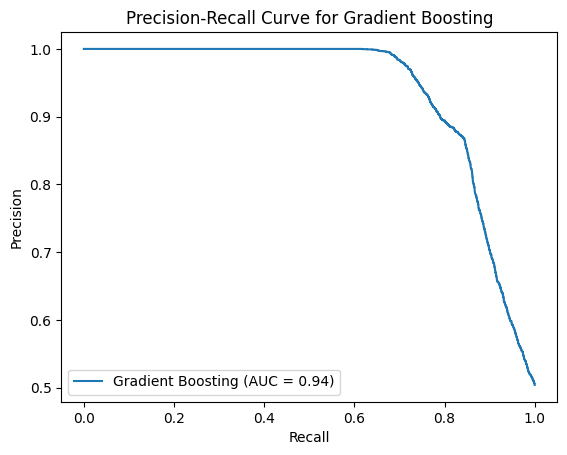

In [ ]:
gb_probs = gb_model.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, gb_probs)

pr_auc_gb = auc(recall, precision)

plt.plot(recall, precision, label=f'Gradient Boosting (AUC = {pr_auc_gb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.legend(loc='lower left')
plt.show()


# Hyper Parameter Tuning

## XGboost

In [ ]:
#tuning for XGBoost
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [8, 10],
    'learning_rate': [0.01, 0.03],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0.1, 0.2]
}
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)
optimized_xgb = grid_search.best_params_

In [ ]:
print(optimized_xgb)

{'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.8}


Accuracy 0.881267044262639
Precision: 0.9471890971039182
F1 score: 0.8730372364288919
ROC AUC Score: 0.881873047683749
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4727
           1       0.95      0.81      0.87      4807

    accuracy                           0.88      9534
   macro avg       0.89      0.88      0.88      9534
weighted avg       0.89      0.88      0.88      9534



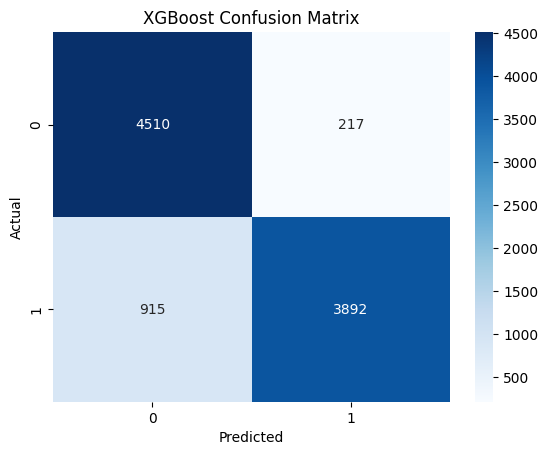

In [ ]:
XG_imp= XGBClassifier(random_state=42,use_label_encoder=False,**optimized_xgb)
XG_imp.fit(x_train,y_train)
XG_imp_pred=XG_imp.predict(x_test)
print("Accuracy",accuracy_score(y_test,XG_imp_pred))
print('Precision:',precision_score(y_test,XG_imp_pred))
print('F1 score:',f1_score(y_test,XG_imp_pred))
print('ROC AUC Score:',roc_auc_score(y_test,XG_imp_pred))
print("Classification Report:\n", classification_report(y_test, XG_imp_pred))
sns.heatmap(confusion_matrix(y_test, XG_imp_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

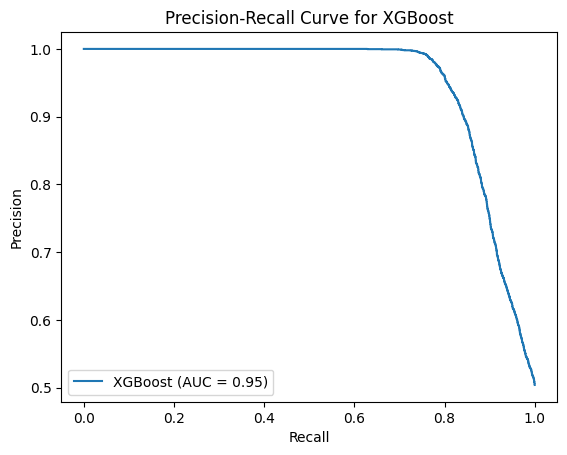

In [ ]:
xgb_probs = XG_imp.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, xgb_probs)

pr_auc_optxgb = auc(recall, precision)

plt.plot(recall, precision, label=f'XGBoost (AUC = {pr_auc_optxgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc='lower left')
plt.show()

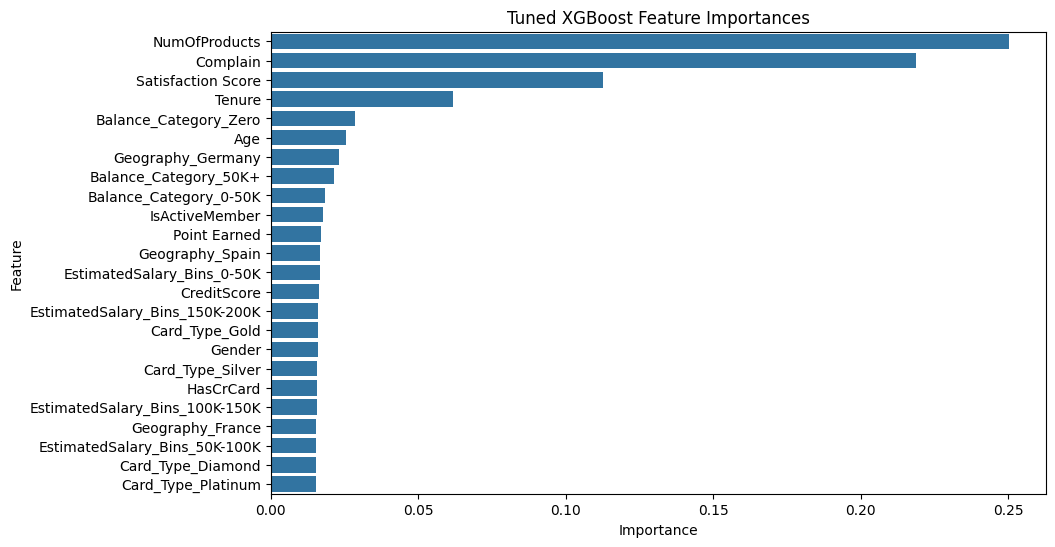

In [ ]:
importances = XG_imp.feature_importances_
feature_names = x_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Tuned XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## RF

In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'bootstrap': [True,False]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=10, n_jobs=-1, verbose=2, scoring='f1')
rf_grid_search.fit(x_train, y_train)

best_params_rf = rf_grid_search.best_params_
print(rf_grid_search.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200}


Optimized Random Forest Performance:
Accuracy: 0.8911264946507237
Precision: 0.934918070620817
F1 score: 0.886433260393873
ROC AUC Score: 0.8915360325531894
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      4727
           1       0.93      0.84      0.89      4807

    accuracy                           0.89      9534
   macro avg       0.89      0.89      0.89      9534
weighted avg       0.90      0.89      0.89      9534



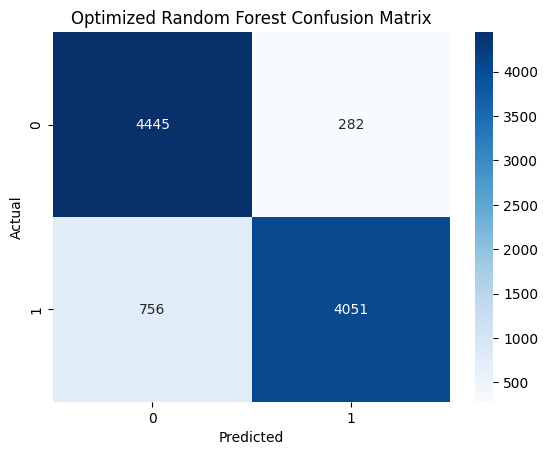

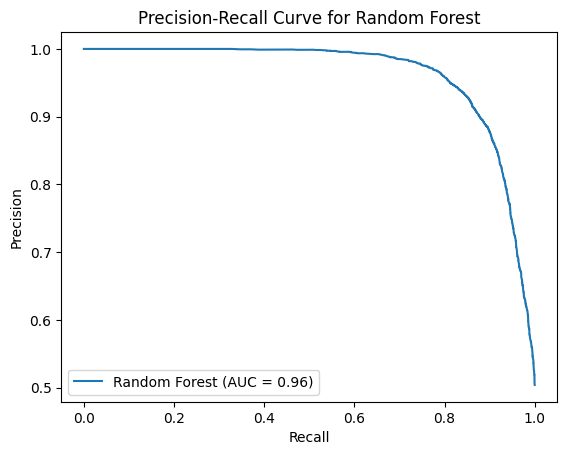

In [ ]:
rf_optimized = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=30,bootstrap=False, random_state=42)
rf_optimized.fit(x_train, y_train)

rf_optimized_pred = rf_optimized.predict(x_test)
print("Optimized Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_optimized_pred))
print('Precision:',precision_score(y_test,rf_optimized_pred))
print('F1 score:',f1_score(y_test,rf_optimized_pred))
print('ROC AUC Score:',roc_auc_score(y_test,rf_optimized_pred))
print("Classification Report:\n", classification_report(y_test, rf_optimized_pred))
sns.heatmap(confusion_matrix(y_test, rf_optimized_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Optimized Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()
rf_probs = rf_optimized.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, rf_probs)
pr_auc_optrf = auc(recall, precision)
plt.plot(recall, precision, label=f'Random Forest (AUC = {pr_auc_optrf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='lower left')
plt.show()

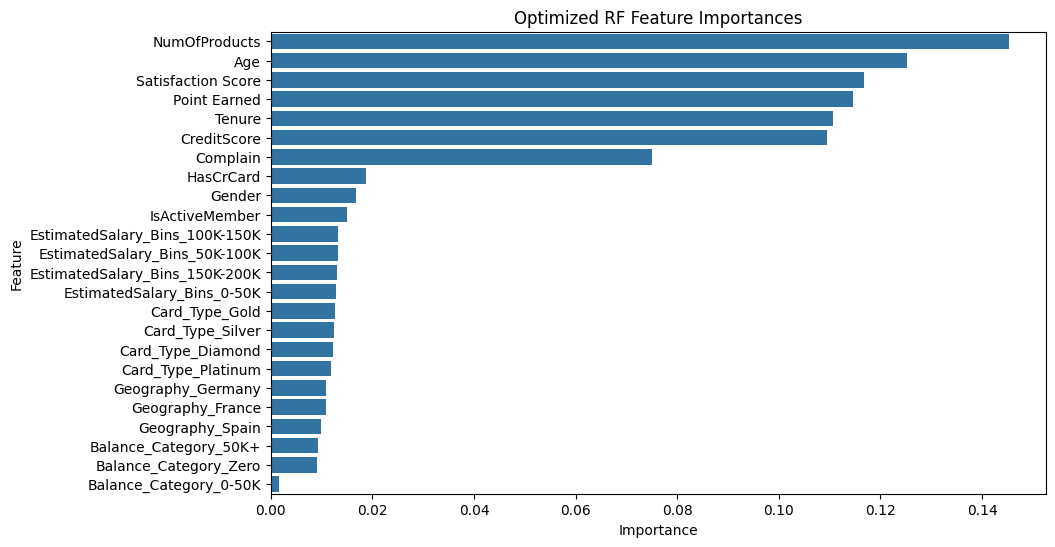

In [ ]:
importances = rf_optimized.feature_importances_
feature_names = x_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Optimized RF Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Logistic regression

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(log_model, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(x_train, y_train)

best_params_lr = grid_search_lr.best_params_
print("Best hyperparameters for Logistic Regression:", best_params_lr)

log_optimized = LogisticRegression(**best_params_lr, random_state=42)
log_optimized.fit(x_train, y_train)

# Predict and evaluate
log_optimized_pred = log_optimized.predict(x_test)
print("Optimized Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, log_optimized_pred))
print("Classification Report:\n", classification_report(y_test, log_optimized_pred))
print('Precision:', precision_score(y_test, log_optimized_pred))
print('F1 score:', f1_score(y_test, log_optimized_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, log_optimized_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, log_optimized_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Optimized Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict probabilities for the positive class
log_probs = log_optimized.predict_proba(x_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, log_probs)


pr_auc_optlr = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label=f'Logistic Regression (AUC = {pr_auc_optlr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='lower left')
plt.show()

# Comparison of models bulit

In [ ]:
model_metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Gradient Boosting', 'Optimized XGBoost', 'Optimized Random Forest', 'Optimized Logistic Regression'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC Score': [],
    'Precision-Recall AUC': [],
}

# Append the evaluation metrics for each model
model_metrics['Accuracy'].append(accuracy_score(y_test, log_pred))
model_metrics['Precision'].append(precision_score(y_test, log_pred))
model_metrics['Recall'].append(recall_score(y_test, log_pred))
model_metrics['F1 Score'].append(f1_score(y_test, log_pred))
model_metrics['ROC AUC Score'].append(roc_auc_score(y_test, log_pred))
model_metrics['Precision-Recall AUC'].append(auc_lr)


model_metrics['Accuracy'].append(accuracy_score(y_test, rf_pred))
model_metrics['Precision'].append(precision_score(y_test, rf_pred))
model_metrics['Recall'].append(recall_score(y_test, rf_pred))
model_metrics['F1 Score'].append(f1_score(y_test, rf_pred))
model_metrics['ROC AUC Score'].append(roc_auc_score(y_test, rf_pred))
model_metrics['Precision-Recall AUC'].append(pr_auc_rf)

model_metrics['Accuracy'].append(accuracy_score(y_test, xgb_pred))
model_metrics['Precision'].append(precision_score(y_test, xgb_pred))
model_metrics['Recall'].append(recall_score(y_test, xgb_pred))
model_metrics['F1 Score'].append(f1_score(y_test, xgb_pred))
model_metrics['ROC AUC Score'].append(roc_auc_score(y_test, xgb_pred))
model_metrics['Precision-Recall AUC'].append(pr_auc_xgb)

model_metrics['Accuracy'].append(accuracy_score(y_test, svm_pred))
model_metrics['Precision'].append(precision_score(y_test, svm_pred))
model_metrics['Recall'].append(recall_score(y_test, svm_pred))
model_metrics['F1 Score'].append(f1_score(y_test, svm_pred))
model_metrics['ROC AUC Score'].append(roc_auc_score(y_test, svm_pred))
model_metrics['Precision-Recall AUC'].append(auc_svm)

model_metrics['Accuracy'].append(accuracy_score(y_test, gb_pred))
model_metrics['Precision'].append(precision_score(y_test, gb_pred))
model_metrics['Recall'].append(recall_score(y_test, gb_pred))
model_metrics['F1 Score'].append(f1_score(y_test, gb_pred))
model_metrics['ROC AUC Score'].append(roc_auc_score(y_test, gb_pred))
model_metrics['Precision-Recall AUC'].append(pr_auc_gb)

model_metrics['Accuracy'].append(accuracy_score(y_test, XG_imp_pred))
model_metrics['Precision'].append(precision_score(y_test, XG_imp_pred))
model_metrics['Recall'].append(recall_score(y_test,XG_imp_pred))
model_metrics['F1 Score'].append(f1_score(y_test, XG_imp_pred))
model_metrics['ROC AUC Score'].append(roc_auc_score(y_test, XG_imp_pred))
model_metrics['Precision-Recall AUC'].append(pr_auc_optxgb)

model_metrics['Accuracy'].append(accuracy_score(y_test, rf_optimized_pred))
model_metrics['Precision'].append(precision_score(y_test, rf_optimized_pred))
model_metrics['Recall'].append(recall_score(y_test, rf_optimized_pred))
model_metrics['F1 Score'].append(f1_score(y_test, rf_optimized_pred))
model_metrics['ROC AUC Score'].append(roc_auc_score(y_test, rf_optimized_pred))
model_metrics['Precision-Recall AUC'].append(pr_auc_optrf)


model_metrics['Accuracy'].append(accuracy_score(y_test, log_optimized_pred))
model_metrics['Precision'].append(precision_score(y_test, log_optimized_pred))
model_metrics['Recall'].append(recall_score(y_test, log_optimized_pred))
model_metrics['F1 Score'].append(f1_score(y_test, log_optimized_pred))
model_metrics['ROC AUC Score'].append(roc_auc_score(y_test, log_optimized_pred))
model_metrics['Precision-Recall AUC'].append(pr_auc_optlr)

metrics_df = pd.DataFrame(model_metrics)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Precision-Recall AUC
0,Logistic Regression,0.639815,0.736806,0.444352,0.554373,0.641469,0.702330
1,Random Forest,0.801133,0.887617,0.693364,0.778556,0.802045,0.899331
2,XGBoost,0.877806,0.945450,0.804036,0.869028,0.878430,0.943914
3,SVM,0.643382,0.764972,0.422509,0.544358,0.645251,0.670605
4,Gradient Boosting,0.850535,0.923173,0.767423,0.838123,0.851238,0.935897
5,Optimized XGBoost,0.881267,0.947189,0.809653,0.873037,0.881873,0.948349
6,Optimized Random Forest,0.891126,0.934918,0.842729,0.886433,0.891536,0.961702
7,Optimized Logistic Regression,0.637927,0.728345,0.449553,0.555956,0.639521,0.698975


# Testing the model

In [ ]:
test=x_test.iloc[9].values

In [ ]:
pred=rf_optimized.predict(test.reshape(1,-1))

In [ ]:
pred

array([1])

In [ ]:
actual=y_test.iloc[9]
actual

np.int64(1)

In [ ]:
test=x_test.iloc[20].values

In [ ]:
pred=rf_optimized.predict(test.reshape(1,-1))

In [ ]:
pred

array([0])

In [ ]:
y_test.iloc[20]

np.int64(0)

# Creating pickle file

In [ ]:
import pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(rf_optimized, file)
with open('scl.pkl','wb') as file:
  pickle.dump(scaler,file)